1. Loading the Raw Data

2. Data Preprocessing

EDA
Data Cleaning
Feature Selection

3. Splitting the Raw Data

In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# 1 Loading the data


In [2]:
# Load data

raw_data= pd.read_csv('/Users/stephenadjei/Desktop/UUCS/UCS.csv')
# print the shape

print(raw_data.shape)

#runs the first 5 rows

raw_data.head()

(2056, 9)


Index  DEPTH(ft)  WOB(klbf)  TORQUE(kft.lbf)  SPP(psi)  RPM(1/min)  \
0      1     4507.0     19.803            8.481  2385.043     107.269   
1      2     4507.5     19.823            8.472  2393.532     108.038   
2      3     4509.0     19.883            8.437  2416.488     110.125   
3      4     4509.5     19.902            8.423  2423.391     110.758   
4      5     4510.0     19.921            8.408  2429.969     111.366   

   ROP(ft/h)  Fow Rate, gpm    UCS, psi  
0     35.003         796.643  11397.938  
1     35.188         797.978  11393.243  
2     35.611         801.620  11372.686  
3     35.712         802.726  11369.645  
4     35.792         803.784  11367.988

In [3]:
raw_data.tail()

Index  DEPTH(ft)  WOB(klbf)  TORQUE(kft.lbf)  SPP(psi)  RPM(1/min)  \
2051   2052     7416.5     14.720            9.697  2992.557     101.026   
2052   2053     7417.5     14.568            9.673  2993.968     101.187   
2053   2054     7420.0     14.190            9.617  2998.084     101.477   
2054   2055     7422.0     13.843            9.566  3001.706     101.666   
2055   2056     7425.0     13.508            9.533  3008.029     102.135   

      ROP(ft/h)  Fow Rate, gpm   UCS, psi  
2051     72.966         651.297  7884.928  
2052     72.831         651.338  8046.313  
2053     72.492         651.372  8419.522  
2054     72.656         651.371  8764.563  
2055     72.835         651.332  9165.711

In [6]:
#here I am changing the column names
raw_data.columns=['Index','DEPTH','WOB','TORQUE','SPP','RPM','ROP','Flow_rate','UCS']
raw_data

Index   DEPTH     WOB  TORQUE       SPP      RPM     ROP  Flow_rate  \
0         1  4507.0  19.803   8.481  2385.043  107.269  35.003    796.643   
1         2  4507.5  19.823   8.472  2393.532  108.038  35.188    797.978   
2         3  4509.0  19.883   8.437  2416.488  110.125  35.611    801.620   
3         4  4509.5  19.902   8.423  2423.391  110.758  35.712    802.726   
4         5  4510.0  19.921   8.408  2429.969  111.366  35.792    803.784   
...     ...     ...     ...     ...       ...      ...     ...        ...   
2051   2052  7416.5  14.720   9.697  2992.557  101.026  72.966    651.297   
2052   2053  7417.5  14.568   9.673  2993.968  101.187  72.831    651.338   
2053   2054  7420.0  14.190   9.617  2998.084  101.477  72.492    651.372   
2054   2055  7422.0  13.843   9.566  3001.706  101.666  72.656    651.371   
2055   2056  7425.0  13.508   9.533  3008.029  102.135  72.835    651.332   

            UCS  
0     11397.938  
1     11393.243  
2     11372.686  
3     11369.645  
4     11367.988  
...         ...  
2051   7884.928  
2052   8046.313  
2053   8419.522  
2054   8764.563  
2055   9165.711  

[2056 rows x 9 columns]

In [7]:
raw_data.describe().T # data statistics- transposing it makes it more clearer



count         mean          std       min         25%        50%  \
Index      2056.0  1028.500000   593.660397     1.000   514.75000  1028.5000   
DEPTH      2056.0  5950.510214   838.825496  4507.000  5214.75000  5966.7500   
WOB        2056.0    12.132094     7.036865     1.944     5.66650    11.4470   
TORQUE     2056.0     7.482488     1.754263     4.420     6.17475     7.0620   
SPP        2056.0  2604.415548   190.394168  2236.981  2468.96275  2611.8870   
RPM        2056.0   128.666565    15.262018    92.433   118.90050   134.1010   
ROP        2056.0    66.031737    17.498662    35.003    48.89200    70.0995   
Flow_rate  2056.0   729.262389    74.649332   639.067   661.83550   700.1105   
UCS        2056.0  6193.381358  3049.984693  1164.482  3880.39450  5240.8135   

                  75%        max  
Index      1542.25000   2056.000  
DEPTH      6671.25000   7425.000  
WOB          19.26150     24.115  
TORQUE        9.11125     10.660  
SPP        2772.09750   3008.029  
RPM         139.56125    159.649  
ROP          77.74900    108.348  
Flow_rate   808.03950    852.611  
UCS        9005.46175  12640.002

In [8]:
#conda install python-docs--channel conda-forge

In [9]:
#extract information from the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      2056 non-null   int64  
 1   DEPTH      2056 non-null   float64
 2   WOB        2056 non-null   float64
 3   TORQUE     2056 non-null   float64
 4   SPP        2056 non-null   float64
 5   RPM        2056 non-null   float64
 6   ROP        2056 non-null   float64
 7   Flow_rate  2056 non-null   float64
 8   UCS        2056 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 144.7 KB


# Data Processing  

# 1- Exploratory Data Analysis: null,

In [10]:
# Checking for null values

#The function dataname.isnull().sum()returns the number of missing values in the data set.
raw_data.isnull().sum()     #.sum() summarizes by column

Index        0
DEPTH        0
WOB          0
TORQUE       0
SPP          0
RPM          0
ROP          0
Flow_rate    0
UCS          0
dtype: int64

In [11]:
# Visualize the NULL observations
#raw_data[raw_data['Cement'].isnull()]   #for example

#below are the observations in week that has Nan values

# Ways of dealing with missing data

Delete the whole observation
Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [12]:
# Data Cleaning for Nan

# to deal with NAN we can interpolate (recommended)
#data['column name'].replace(0,np.nan).interpolate().plot(figsize=(12,4))   #replacement with
#plot(figsize=(12,4))  is just for visualization


#2 using average 

#avg_temp = data['column name'].mean()
#data['column name'].replace(0,avg_temp).plot(figsize=(12,3))


#3 deleting

# applying to the original datat set
#original data['AVG_DOWNHOLE_PRESSURE'] = new data['AVG_DOWNHOLE_PRESSURE']



In [13]:
# Deleting the NULL values - in all rows

raw_data.dropna()

#note that table has been updated looking at the shape




Index   DEPTH     WOB  TORQUE       SPP      RPM     ROP  Flow_rate  \
0         1  4507.0  19.803   8.481  2385.043  107.269  35.003    796.643   
1         2  4507.5  19.823   8.472  2393.532  108.038  35.188    797.978   
2         3  4509.0  19.883   8.437  2416.488  110.125  35.611    801.620   
3         4  4509.5  19.902   8.423  2423.391  110.758  35.712    802.726   
4         5  4510.0  19.921   8.408  2429.969  111.366  35.792    803.784   
...     ...     ...     ...     ...       ...      ...     ...        ...   
2051   2052  7416.5  14.720   9.697  2992.557  101.026  72.966    651.297   
2052   2053  7417.5  14.568   9.673  2993.968  101.187  72.831    651.338   
2053   2054  7420.0  14.190   9.617  2998.084  101.477  72.492    651.372   
2054   2055  7422.0  13.843   9.566  3001.706  101.666  72.656    651.371   
2055   2056  7425.0  13.508   9.533  3008.029  102.135  72.835    651.332   

            UCS  
0     11397.938  
1     11393.243  
2     11372.686  
3     11369.645  
4     11367.988  
...         ...  
2051   7884.928  
2052   8046.313  
2053   8419.522  
2054   8764.563  
2055   9165.711  

[2056 rows x 9 columns]

# Drop in specific column

In [10]:
#raw_data= raw_data.dropna(subset=['Week'], axis =1)   #drops only in specific column # start with data name to update
#raw_data.shape     # you can add more columns in the bracket.

In [14]:
# Visualize the NULL observations after dropping

raw_data.isnull().sum() 

Index        0
DEPTH        0
WOB          0
TORQUE       0
SPP          0
RPM          0
ROP          0
Flow_rate    0
UCS          0
dtype: int64

In [12]:
raw_data.columns   #calling columns

Index(['Index', 'DEPTH', 'WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate',
       'UCS'],
      dtype='object')

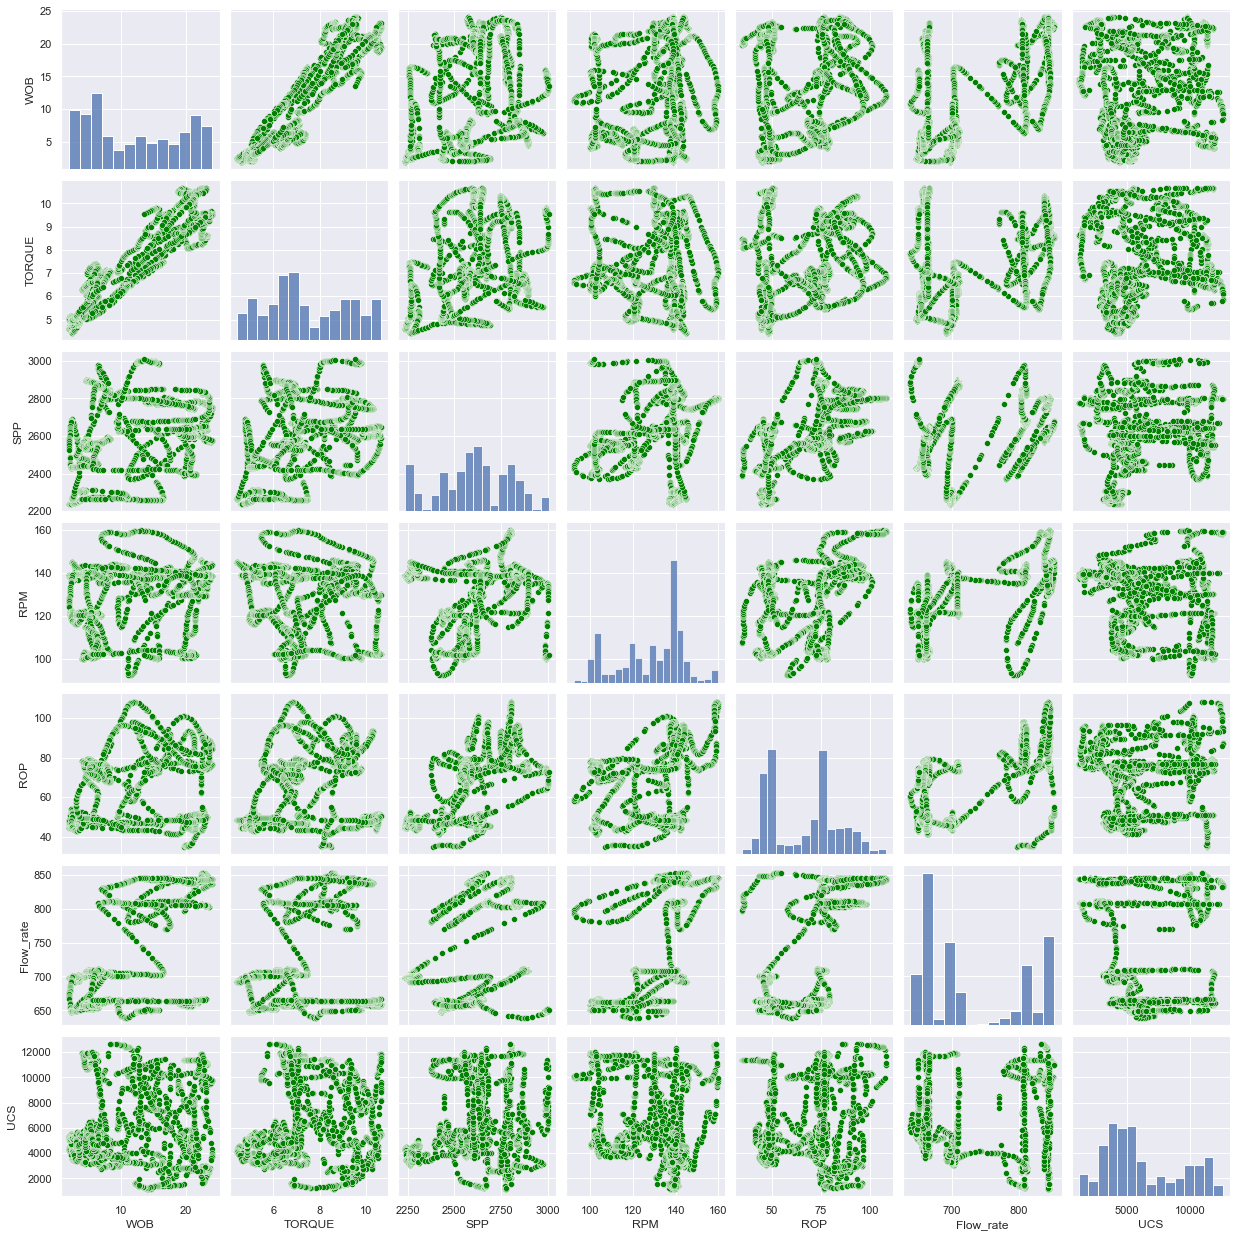

In [13]:

ax= sns.pairplot(raw_data[['WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate','UCS']], plot_kws= {'color':'green'})

# Data Cleaning  - remove outliers

# Feature Selection (selection of subset to feed into our algorithm)

In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time


2 ways to help us select the important features are:
Correlation
Feature Importance

In [14]:
raw_data.columns

Index(['Index', 'DEPTH', 'WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate',
       'UCS'],
      dtype='object')

# Investigate the distribution of Revenue by Categorical Variables (Day_Name and Promo)

ax=sns.boxplot(data=raw_data, x='WOB', y='UCS')

# we know the median, 25 and 75 percentile, range and range for the entire data
               
#ax = sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, palette = pal, hue = 'Promo')

## Relationship between data

#  Running Correlation Feature Importance for Feature Selection

In [15]:
# variables should be correlated with the target but uncorrelated among themselves.
# if two features are correlated, the model only needs one, as the second does not add additional information.

In [15]:
# 1 Running Pearson Correlation

new_raw_data=raw_data[['WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate','UCS' ]]



#this is the dataset we are going to feed into the correlation

In [16]:
# feeding into correlation

hm=new_raw_data[['WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate','UCS' ]].corr()




Notes
.corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation
More Info here: https://statisticsbyjim.com/basics/correlations/

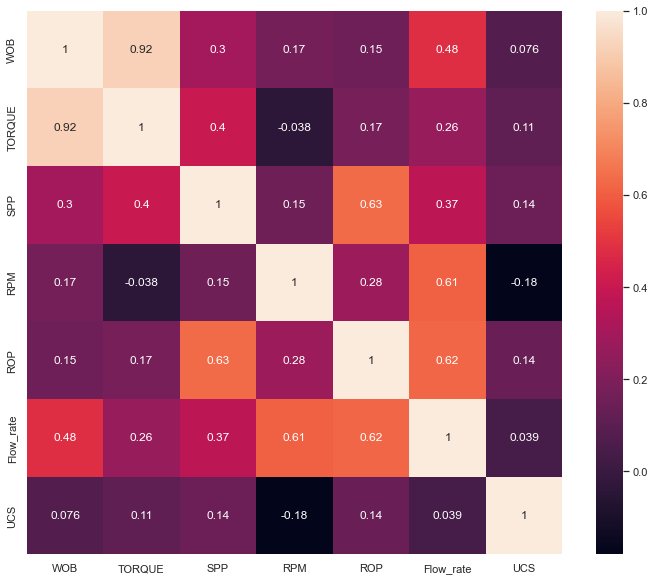

In [17]:
# Visualizing Correlation with a Heatmap

g= sns.heatmap(hm,annot=True)   #annot adds the values on the map


#relationship whereas a value of 0.8 or higher will indicate a strong positive relationship between 
#the input and output variables. 

#since it is not zero, the exists some for of linear relationship

In [18]:
# Plotting

# converting data into a series and then subsequently into a dataframe for easy plotting

Features = pd.Series(["WOB","TORQUE","SPP","RPM","ROP","Flow_rate"])

Correlation_Coefficient  = pd.Series([0.076,0.11,0.14,-0.18,0.14,0.039])

DF= pd.DataFrame({"Features": Features, "Correlation_Coefficient":Correlation_Coefficient})

DF

Features  Correlation_Coefficient
0        WOB                    0.076
1     TORQUE                    0.110
2        SPP                    0.140
3        RPM                   -0.180
4        ROP                    0.140
5  Flow_rate                    0.039

[Text(0, 0, '0.076'),
 Text(0, 0, '0.11'),
 Text(0, 0, '0.14'),
 Text(0, 0, '-0.18'),
 Text(0, 0, '0.14'),
 Text(0, 0, '0.039')]

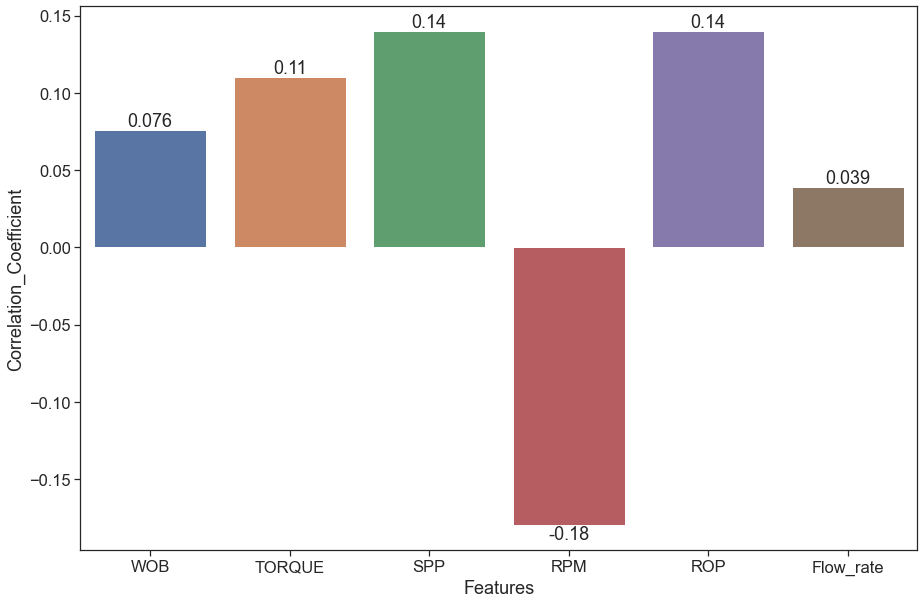

In [19]:

plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

ax=sns.barplot(data=DF, x='Features', y='Correlation_Coefficient')

ax = sns.barplot(x='Features', y='Correlation_Coefficient', data=DF)

ax.bar_label(ax.containers[0]) #adds the numbers to the bar chat

# DecisionTreeRegressor Feature Importance

In [20]:
# Split the data into X & y

X= new_raw_data.drop('UCS', axis=1).values # values helps u feed data into algorithm  as array(and not dataframe)

y = new_raw_data['UCS']

print(X.shape)
print(y.shape)

X

(2056, 6)
(2056,)


array([[19.803000, 8.481000, 2385.043000, 107.269000, 35.003000,
        796.643000],
       [19.823000, 8.472000, 2393.532000, 108.038000, 35.188000,
        797.978000],
       [19.883000, 8.437000, 2416.488000, 110.125000, 35.611000,
        801.620000],
       ...,
       [14.190000, 9.617000, 2998.084000, 101.477000, 72.492000,
        651.372000],
       [13.843000, 9.566000, 3001.706000, 101.666000, 72.656000,
        651.371000],
       [13.508000, 9.533000, 3008.029000, 102.135000, 72.835000,
        651.332000]])

In [21]:
# Step 2

# Run a Tree-based estimators (i.e. decision trees & random forests)

# and feed the x and y into them to get the feature importance

# let's use decision tree

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=15, max_depth=10)    #initializes the decision tree/model
                                                             #the number is to help replicate the results


#now feed X and y

model.fit(X,y)

DecisionTreeRegressor(max_depth=10, random_state=15)

In [22]:
# Step 3

# Running Feature Importance

    
for i, column in enumerate(new_raw_data.drop('UCS', axis=1)):
    print('the feature importance for {} is: {:.3f}'.format (column,model.feature_importances_[i]))
    
    
    #in one work 0.02 was considered great
    


the feature importance for WOB is: 0.077
the feature importance for TORQUE is: 0.150
the feature importance for SPP is: 0.098
the feature importance for RPM is: 0.345
the feature importance for ROP is: 0.171
the feature importance for Flow_rate is: 0.159


In [23]:
model.feature_importances_

array([0.077228, 0.150320, 0.098107, 0.344731, 0.170546, 0.159068])

In [24]:
# Plotting

# converting data into a dataframe

Features = pd.Series(["WOB","TORQUE","SPP","RPM","ROP","Flow_rate"])

Score  = pd.Series([0.077228,0.150320,0.098107,0.344731,0.170546,0.159068])

ND= pd.DataFrame({"Features": Features, "Score":Score})

ND


Features     Score
0        WOB  0.077228
1     TORQUE  0.150320
2        SPP  0.098107
3        RPM  0.344731
4        ROP  0.170546
5  Flow_rate  0.159068

[Text(0, 0, '0.077228'),
 Text(0, 0, '0.15032'),
 Text(0, 0, '0.098107'),
 Text(0, 0, '0.344731'),
 Text(0, 0, '0.170546'),
 Text(0, 0, '0.159068')]

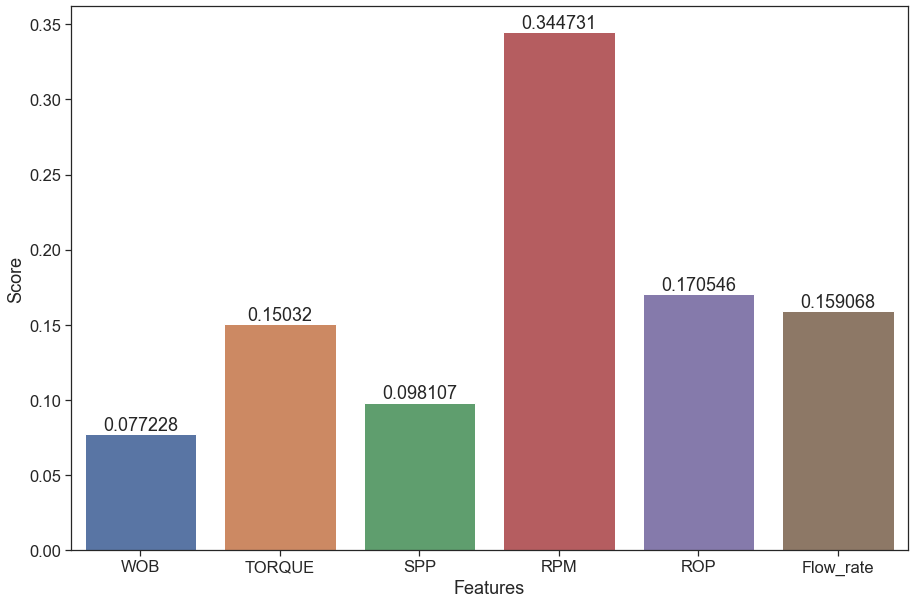

In [25]:

plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

ax=sns.barplot(data=ND, x='Features', y='Score')
ax = sns.barplot(x='Features', y='Score', data=ND)
ax.bar_label(ax.containers[0])

# Separation of dependent and independent data

In [26]:
X = new_raw_data.drop('UCS', axis = 1)
y=new_raw_data.UCS

# Standardization
# standardization refers to (usually) making the mean equal to zero and std equal to 1. 

X = new_raw_data.drop("UUCS", axis = 1)
y=new_raw_data.UUCS

from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns)
X.head()

In [27]:
# normalization



#Normalization refers to transforming the data to the range of [0, 1] (or any range), 
#or sometimes just transforming the data on the unit sphere.

from sklearn.preprocessing import MinMaxScaler #normalization

scale_vars=['WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate']
scaler=MinMaxScaler()
new_raw_data[scale_vars]= scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


WOB    TORQUE       SPP       RPM       ROP  Flow_rate        UCS
0  0.805512  0.650801  0.192027  0.220721  0.000000   0.737909  11397.938
1  0.806414  0.649359  0.203037  0.232162  0.002522   0.744160  11393.243
2  0.809120  0.643750  0.232809  0.263211  0.008290   0.761215  11372.686
3  0.809977  0.641506  0.241762  0.272629  0.009667   0.766395  11369.645
4  0.810834  0.639103  0.250293  0.281674  0.010757   0.771349  11367.988

# We are now done with EDA

# Note 

We will use all the features since they are not that many

Notes:
Please note that we have not normalised / scale our data
Please note that we have not done any feature engineering - created new features
Please note that we have not joined multiple datasets together
Please note that we have not aggregated any of our data

# Splitting the Raw Data - Hold-out validation

In [28]:
#split our data and train it based on a subset to preventing over fitting

# there are cross-validation and hold-out validation

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




#create 4 subset
#X_train and X_test will have data from x
#y_train and y_test will have data from y
#note we have training here 

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(1439, 6)
(617, 6)
(1439,)
(617,)


What is Linear Regression Analysis
Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
It models the relationship of 2 plus variables by fitting a linear equation to observed data
In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data

What is Linear Regression Analysis (continued)
A measurement of the relationship between 2 variables is the correlation coefficient; ranging from -1 to 1; the closer to 1 or -1, the stronger the relationship

However, even if there seems to be a relationship, you should always be careful when modelling the relationship between 2 variables as correlation is not causation. For example, the rise of temperature vs Revenue

The mathematical equation of linear regression is Y = a + bX; where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0

The most common cost function used in linear regression is the “Least Squared Errors” function; which is the sum of squared errors (sum(y actuals – y predicted) ^ 2) over the training set; trying to minimize how far off the predictions are from the actuals.

To calculate the “Least Squared Errors” firstly you must calculate the difference of the actual (y) vs the p(y); this is called the residuals.

In order to find the least squared error you will have to find the optimal parameter values (b) that minimize the sum ‘S’ of squared residuals

The optimisation technique used in linear regression is Gradient Descent; which attempts to find a local or a global minimum of a cost function

Gradient descent finds the direction ‘gradient’ that the model/line should take so that the errors will be reduced.

Direction refers to the weights (a and b), and how those weights should be tweaked to further reduce the errors.

The model will iterate until converged; no further improvements can be done; see graph below:

In [30]:
# in LR the cost fuction we use is the sum of least square errors
# The optimization tecnique used is called gradient descent 
#adjust weight--error drops--keep on adjusting weight till the error converges
#different models have different cost functions

# Decision Tree Regressor Train

In [31]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data- training the models
regressor.fit(X_train, y_train) #generates model on training data


DecisionTreeRegressor(random_state=0)

# R2 

In [35]:
y_predTrainR=regressor.predict(X_train)  

print('The r2 on the training dataset is',r2_score(y_train, y_predTrainR))

The accuracy on the testing dataset is 1.0


In [36]:
  

print ('The RMSE on the training data is',sqrt(mean_squared_error(y_train, y_predTrainR))) 

The RMSE on the testing data is 0.0


Text(0, 0.5, 'Predicted values')

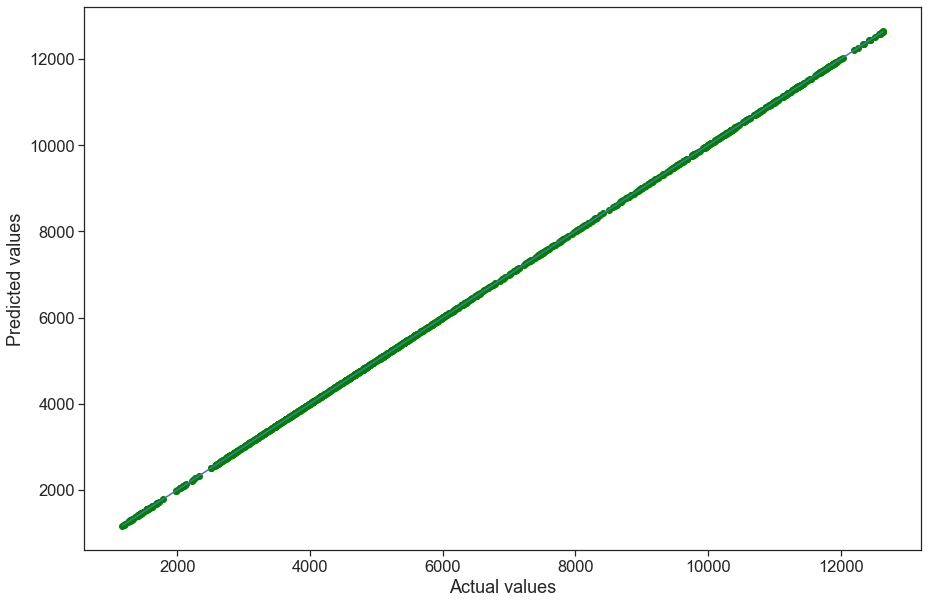

In [37]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_train, y_predTrainR, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')



# Random Forest Train

In [38]:

from sklearn.ensemble import RandomForestRegressor

rd_clf = RandomForestRegressor(random_state=42)

rd_clf.fit(X_train, y_train)  # geerates model on training data



RandomForestRegressor(random_state=42)

# R2

In [39]:
y_predTrainRF=rd_clf.predict(X_train)  

print('The r2 on the training dataset is',r2_score(y_train, y_predTrainRF))

The accuracy on the testing dataset is 0.995952331721358


# RMSE

In [40]:


print ('The RMSE on the training data is',sqrt(mean_squared_error(y_train,y_predTrainRF))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the testing data is 194.13952411090355


Text(0, 0.5, 'Predicted values')

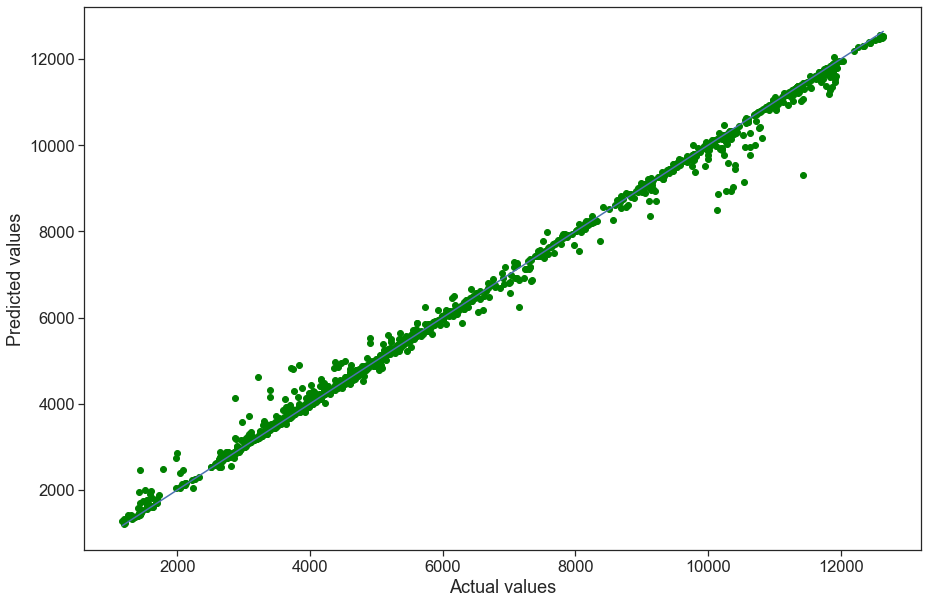

In [41]:
# Plotting Actuals Vs Predicted


#Train data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_train,y_predTrainRF, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#plt.title('Actuals vs Predicted Test Values')



# XGBoost Train

In [42]:
from xgboost import XGBRegressor
xgbhoost = XGBRegressor(verbosity=0,n_jobs=-1) 

xgbhoost.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

# R2

In [43]:
y_predTrainXB=xgbhoost.predict(X_train)  

print('The r2 on the training dataset is',r2_score(y_train, y_predTrainXB))

The accuracy on the training dataset is 0.9996296081793998


# RMSE

In [44]:

print ('The RMSE on the training data is',sqrt(mean_squared_error(y_train,y_predTrainXB))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

The RMSE on the training data is 58.72759253749219


Text(0, 0.5, 'Predicted values')

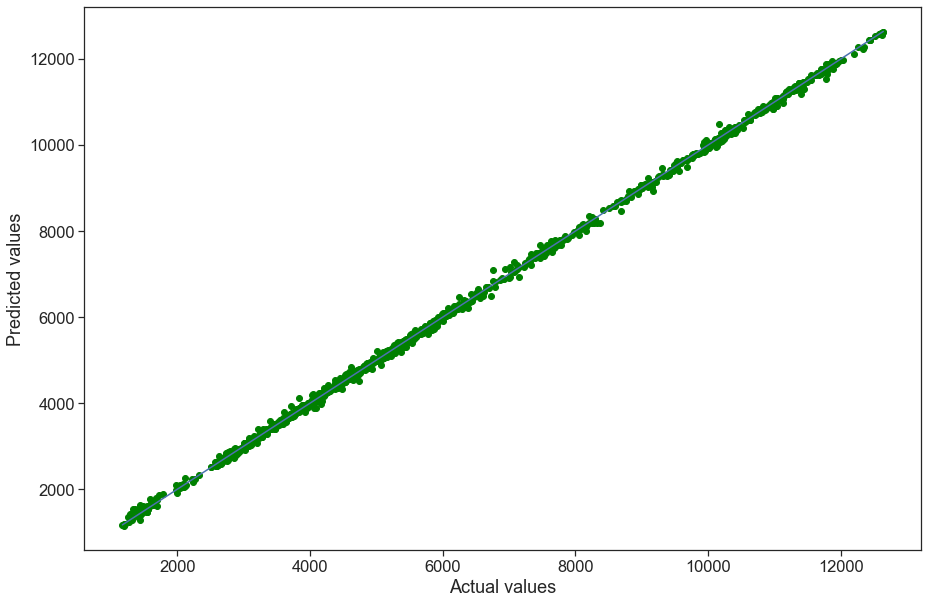

In [45]:
# Plotting Actuals Vs Predicted

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_train, y_predTrainXB, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# Cross Plots of Train Data

Text(0.5, 1.0, 'XGBoost')

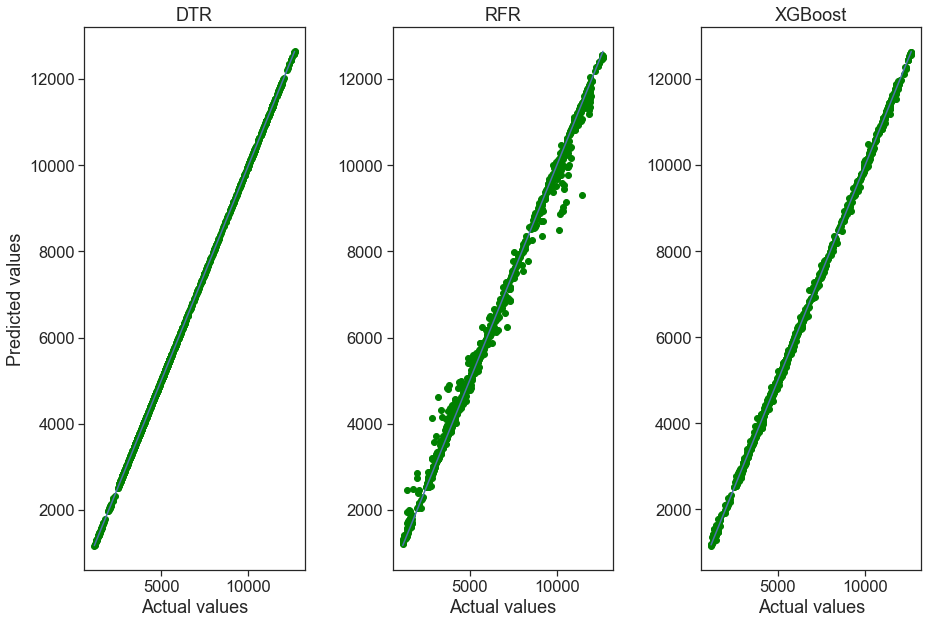

In [48]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.subplots_adjust( wspace=0.4) #space between width

#plt.subplots_adjust(left=0.1,
                    #bottom=0.1, 
                    #right=0.9, 
                    #top=0.9, 
                    #wspace=0.4, 
                    #hspace=0.4)

#DTR
plt.subplot(1,3,1)
plt.scatter(y_train, y_predTrainR, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('DTR')

#RFR
plt.subplot(1,3,2)
plt.scatter(y_train,y_predTrainRF, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
#plt.ylabel('Predicted values')
plt.title('RFR')

#XGBoost
plt.subplot(1,3,3)
plt.scatter(y_train, y_predTrainXB, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
#plt.ylabel('Predicted values')
plt.title('XGBoost')

# Plot of Evaluation Metrics

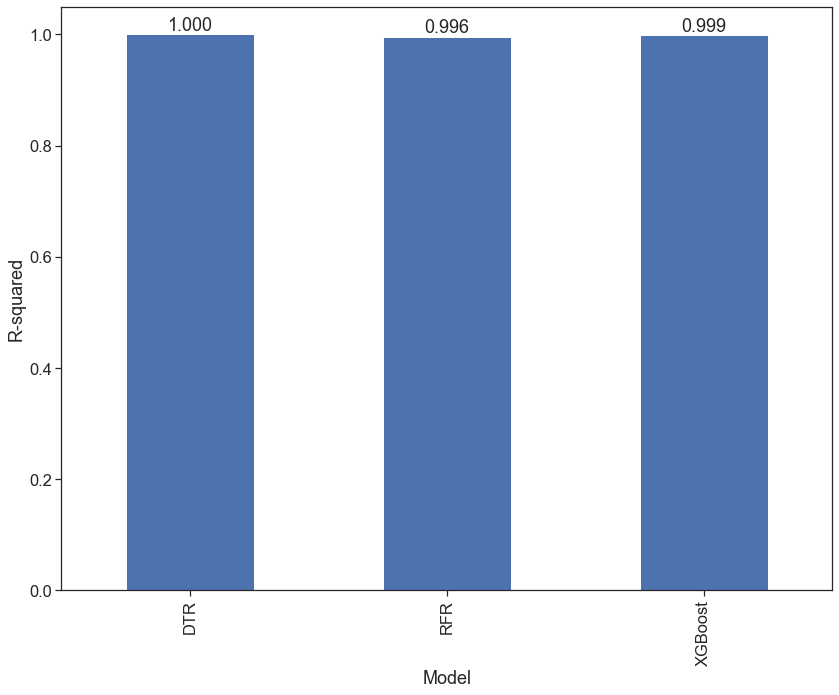

In [49]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared': [1.000, 0.996,0.999],
        'RMSE': [0, 194.140, 58.728]})



ax=DF.plot (x= 'Model',y='R-squared' , kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fmt='%.3f')
        
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # puts legend outside the plot
plt.ylabel('R-squared')
plt.legend('', frameon=False) #removes legend
plt.tight_layout()

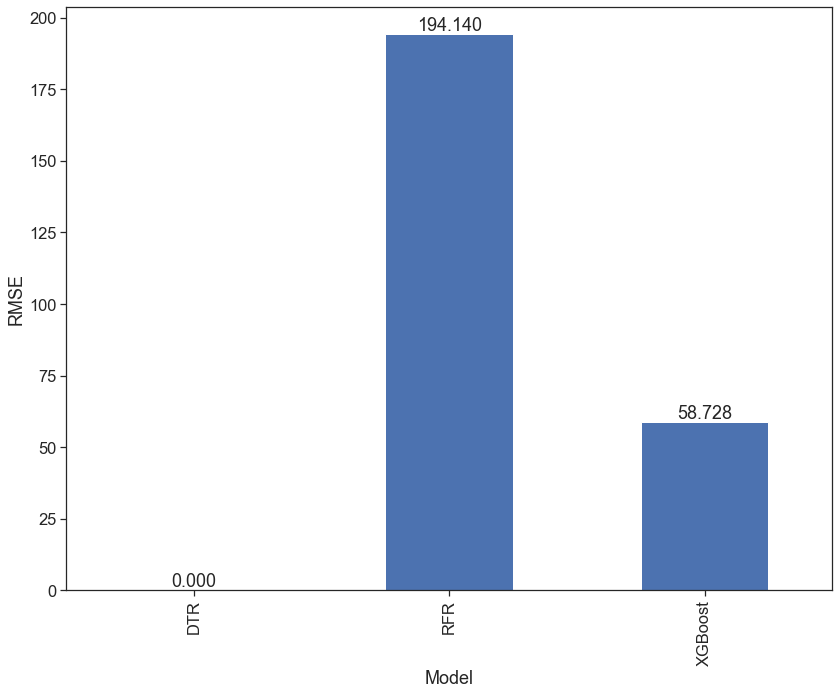

In [50]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared': [1.000, 0.996,0.999],
        'RMSE': [0, 194.140, 58.728]})
ax=DF.plot (x= 'Model',y='RMSE' , kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fmt='%.3f')
        
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # puts legend outside the plot
plt.ylabel('RMSE')
plt.legend('', frameon=False) #removes legend
plt.tight_layout()

# DTR Test Data

# R2 

In [51]:

     # Model Accuracy on testing dataset --- how well it does on unseen data

y_predTestR=regressor.predict(X_test)  

print('The r2 on the testing dataset is',r2_score(y_test, y_predTestR))

The accuracy on the testing dataset is 0.947707159115471


# RMSE

In [52]:

print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestR))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the testing data is 695.8628873435547


Text(0, 0.5, 'Predicted values')

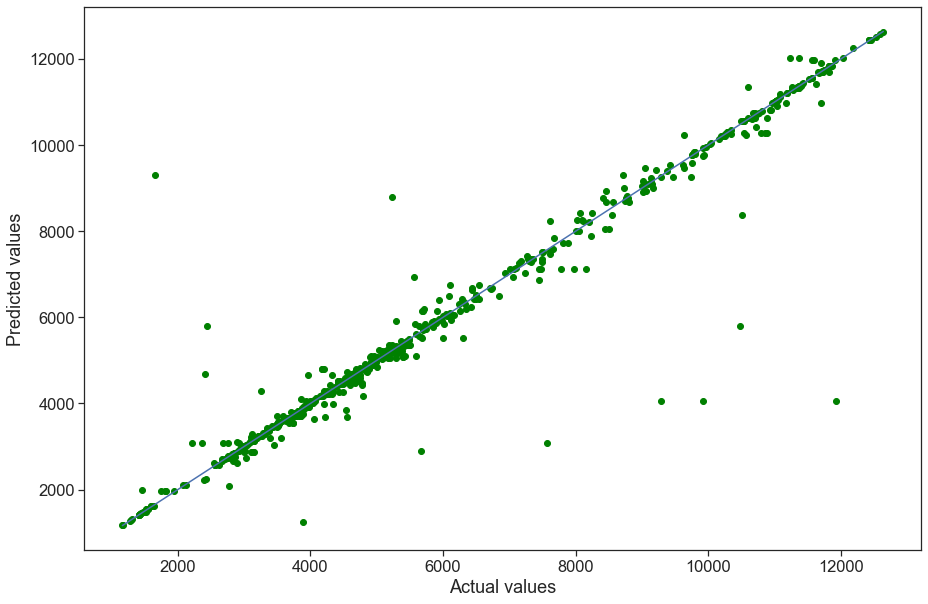

In [53]:
# Plotting Actuals Vs Predicted


#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestR, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# Tuning 

In [54]:
# Tuning hyper parameters for Decision regressor using GridSearchCV on TRAINING DATA


parameters={"splitter":["best","random"],
            "max_depth" : [10,12,14,16,18,20],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
          
            }

In [55]:
from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3,verbose=3)

In [56]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2296.639 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2332.464 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0

[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0

[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2022.301 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1887.074 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1740.575 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2321.070 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2136.035 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2175.377 total

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0

[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2022.301 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1887.074 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1740.575 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2321.070 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2136.035 total

[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0

[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2136.035 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2175.377 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2296.639 total tim

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2332.464 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total

[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2022.301 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1887.074 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1740.575 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2321.070 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2136.035 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2175.377 total

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0

[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0

[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0

[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0

[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total

[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0

[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0

[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2296.639 total

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total

[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0

[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.1s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0

[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0

[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0

[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2175.377 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total

[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0

[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2296.639 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2332.464 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total

[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total

[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0

[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0

[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.1s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0

[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0

[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total

[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0

[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0

[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0

[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0

[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0

[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0

[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.1s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total

[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2332.464 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0

[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0

[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=18, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2296.639 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2332.464 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0

[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0

[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0

[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0

[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0

[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0

[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2321.070 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2136.035 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2175.377 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0

[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0

[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1885.591 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0

[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0

[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2347.954 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2480.539 total time=   0.0

[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1946.635 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1959.401 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2264.529 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2262.156 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2161.963 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2443.160 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2319.042 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0

[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2298.914 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2616.314 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2427.905 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2572.524 total time=   0.0

[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2552.492 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2480.539 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2589.392 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2554.227 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2462.566 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2616.314 total time=   0.0

[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2483.764 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-2192.614 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2276.882 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-2327.082 total time=   0.0

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2491.026 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0

[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2550.588 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2468.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2495.617 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-2388.272 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2522.948 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-2516.333 total time=   0.0

[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-2453.447 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2614.009 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-2419.747 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2649.556 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-2614.009 total time=   0.0

[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-2055.381 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1930.373 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-1841.170 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2290.844 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2268.432 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2146.872 total time=   0.0

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=3)

In [57]:
tuning_model.best_params_   #code for selecting best params

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [58]:
regressor_1 = DecisionTreeRegressor(random_state = 42,max_depth=18,
 max_features='auto',
 min_samples_leaf= 1,
 splitter='best') 
  
# fit the regressor with X and Y data

regressor_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18, max_features='auto', random_state=0)

# R2

In [59]:

     # Model Accuracy on testing dataset --- how well it does on unseen data

y_predTestR1=regressor_1.predict(X_test)  

print('The R2 on the testing dataset is',r2_score(y_test, y_predTestR1))

The accuracy on the testing dataset is 0.9529803441153265


# RMSE

In [60]:
from sklearn.metrics import accuracy_score    #why did he import this?

# The Root Mean Squared Error (RMSE)


print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestR1))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the testing data is 659.8455313495738


Text(0, 0.5, 'Predicted values')

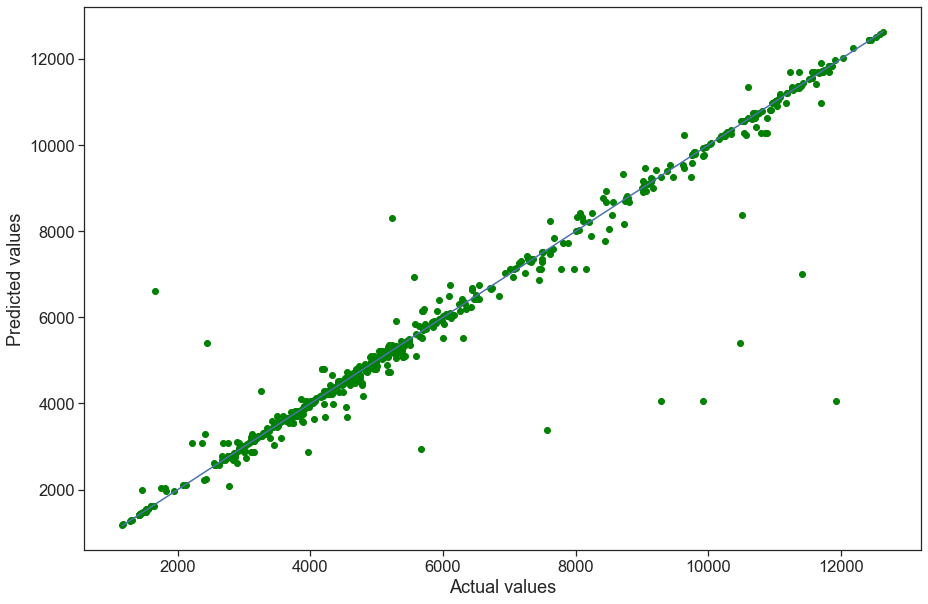

In [61]:

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestR1, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


Text(0.5, 0, 'Actual values')

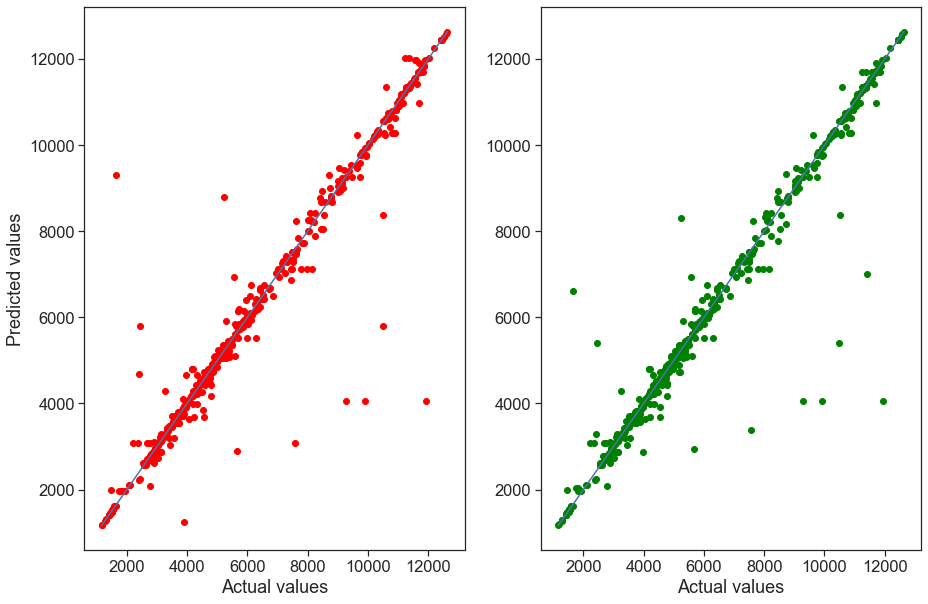

In [62]:
#Subplot


plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

#Parameter on Test
plt.subplot(1,2,1)


plt.scatter(y_test,y_predTestR, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#Hyper Parameter on Test
plt.subplot(1,2,2)

plt.scatter(y_test,y_predTestR1, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
#plt.ylabel('Predicted values')


# Random forest regressor

# Test Data

# R2 

In [63]:

     # Model Accuracy on testing dataset --- how well it does on unseen data

y_predTestRF=rd_clf.predict(X_test)  

print('The r2 on the testing dataset is',r2_score(y_test, y_predTestRF))

The accuracy on the testing dataset is 0.9650636053736208


# RMSE

In [64]:


print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestRF))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the testing data is 568.7764404152974


Text(0, 0.5, 'Predicted values')

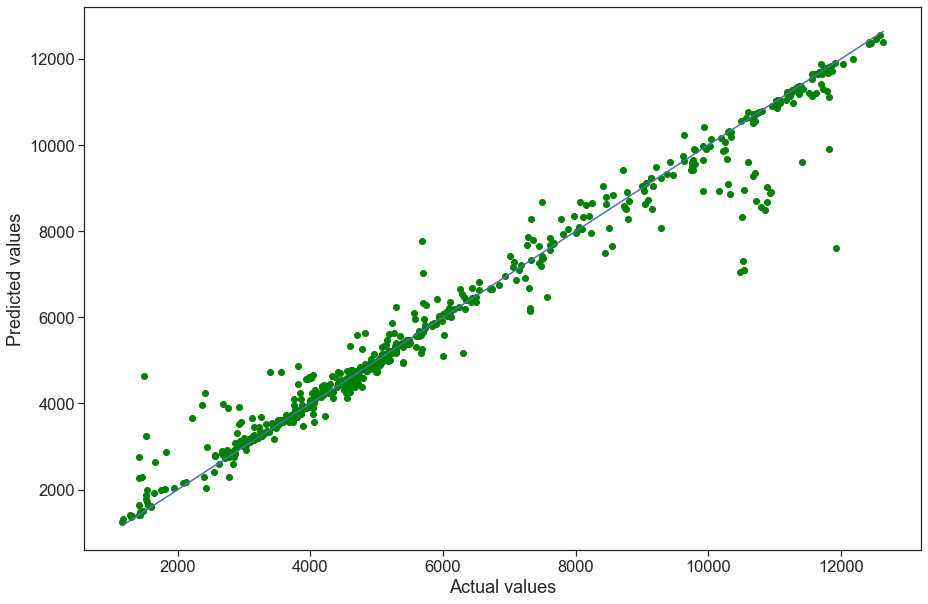

In [65]:
# Plotting Actuals Vs Predicted

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestRF, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# Tunning for RF

In [66]:
# Tunning Random Forest

rd_clf = RandomForestRegressor(random_state=42)

parameters={'n_estimators':[5,20,50,100],
            "max_depth" : [10,12,14,16,18,20],
           "min_samples_leaf":[1,2,3],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
           "max_features":["auto","log2","sqrt", None],
            }

In [67]:

from sklearn.model_selection import GridSearchCV

tuning_model2=GridSearchCV(rd_clf,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3,verbose=3)


In [ ]:
tuning_model2.fit(X_train, y_train)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-436.234 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-382.157 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-460.757 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-443.561 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-431.776 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-419.856 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50;,

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1465.684 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1434.897 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1425.086 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1431.298 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1486.613 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1436.563 total time=   0.1s
[CV 1/3] END max_depth=10, max_featu

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, n_estimators=100;, score=-743.832 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-785.537 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-735.403 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-788.746 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-785.642 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-770.837 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-725.015 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=aut

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, n_estimators=100;, score=-649.615 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-611.232 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-562.496 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-607.422 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-589.584 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-593.757 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-562.794 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=aut

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, n_estimators=100;, score=-531.612 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-601.069 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-553.262 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-589.454 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-571.434 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-579.640 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-549.462 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=aut

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, n_estimators=100;, score=-469.638 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-495.793 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-498.353 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-533.534 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-505.113 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-519.291 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-486.862 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=aut

[CV 3/3] END max_depth=10, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, n_estimators=100;, score=-504.318 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-607.165 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-484.109 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-582.995 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-619.381 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-441.439 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-478.238 total time=   0.1s
[CV 1/3] END max_depth=10, max_

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100;, score=-1508.286 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1534.569 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1585.524 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1542.115 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1522.004 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1590.818 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1528.056 total time=   0.0s
[CV 1/3] END max_depth=10, max_featu

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, n_estimators=100;, score=-790.924 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-912.814 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-843.393 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=5;, score=-833.566 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-876.537 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-862.063 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-838.906 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=log

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, n_estimators=100;, score=-724.188 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-799.573 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-693.539 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=5;, score=-699.028 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-731.660 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-664.238 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=20;, score=-674.076 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=log

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, n_estimators=100;, score=-604.901 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-703.239 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-678.744 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=5;, score=-698.654 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-702.112 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-651.270 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=20;, score=-681.473 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=log

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, n_estimators=100;, score=-539.996 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-696.248 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-576.574 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=5;, score=-599.051 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-644.922 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-574.848 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=20;, score=-618.447 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=log

[CV 3/3] END max_depth=10, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, n_estimators=100;, score=-605.080 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-607.165 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-484.109 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=5;, score=-582.995 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-619.381 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-441.439 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=20;, score=-478.238 total time=   0.1s
[CV 1/3] END max_depth=10, max_

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1534.569 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1585.524 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=5;, score=-1542.115 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1522.004 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1590.818 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=20;, score=-1528.056 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=50;, score=-1550.169 total time=   0.1s
[CV 2/3] END max_depth=10, max_featur

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-862.063 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=20;, score=-838.906 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=50;, score=-894.829 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=50;, score=-819.825 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=50;, score=-792.534 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-899.910 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-825.532 total time=   0.2s
[CV 3/3] END max_depth=10, max_features

[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=50;, score=-700.424 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=50;, score=-620.527 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=50;, score=-626.052 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-701.217 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-622.668 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-626.219 total time=   0.5s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-772.930 total time=   0.0s
[CV 2/3] END max_depth=10, max_features

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=50;, score=-617.930 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=50;, score=-621.513 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-689.227 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-613.919 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-641.496 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-717.748 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-622.101 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=

[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=50;, score=-522.615 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=50;, score=-552.300 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-633.017 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-529.546 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-564.930 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-672.265 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-636.901 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50;, score=-427.693 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50;, score=-422.366 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-445.578 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-417.976 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-415.304 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-477.833 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-457.779 total time=   0.0s
[CV 3/3] END max_depth=10,

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=50;, score=-1486.063 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=50;, score=-1423.475 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=10, max_feat

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=50;, score=-757.689 total time=   0.7s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=50;, score=-736.428 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-780.035 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-748.129 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.627 total time=   0.7s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-745.407 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=50;, score=-582.372 total time=   0.3s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=50;, score=-565.948 total time=   0.3s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-588.399 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-573.317 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-564.432 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-593.894 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-579.225 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=50;, score=-567.980 total time=   0.3s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=50;, score=-551.257 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-569.936 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-565.615 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-554.678 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-538.094 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-497.900 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=50;, score=-486.939 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-502.666 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-495.314 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-484.910 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-566.828 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-500.238 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-545.086 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=N

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50;, score=-370.651 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-388.515 total time=   0.5s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-366.559 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-368.753 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-449.836 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-419.479 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-456.744 total time=   0.0s
[CV 1/3] END max_depth=12, 

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-973.360 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-980.723 total time=   0.1s
[CV 2/3] END max_depth=12, max_feature

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-780.840 total time=   0.7s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.935 total time=   0.7s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.134 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-750.096 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-764.432 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-780.391 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=a

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-580.513 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-565.984 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-559.380 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-591.882 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-576.799 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-617.288 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-580.996 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=a

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-557.915 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-559.301 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-546.955 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-540.712 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-473.129 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-521.301 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-510.643 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=a

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-479.023 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-482.457 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-474.843 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-559.629 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-494.927 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-539.189 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-522.184 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=a

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-453.161 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-374.038 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-375.797 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-490.910 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-545.801 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-523.410 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-518.141 total time=   0.1s
[CV 2/3] END max_depth=12, 

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1591.321 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1560.922 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1508.484 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1092.663 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1081.036 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1067.936 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-1068.891 total time=   0.0s
[CV 2/3] END max_depth=12, max_fea

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-885.957 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-820.371 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-784.027 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-895.467 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-875.850 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-846.802 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-867.540 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=l

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-665.722 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-613.944 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-588.465 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-733.650 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-624.292 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-665.296 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-660.118 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=l

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-646.947 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-602.310 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-583.612 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-646.021 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-627.862 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-574.274 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-585.365 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=l

[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-561.877 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-507.695 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-505.619 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-657.428 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-627.219 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-593.078 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-615.740 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=l

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-453.161 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-374.038 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-375.797 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-490.910 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-545.801 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-523.410 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-518.141 total time=   0.1s
[CV 2/3] END max_depth=12, 

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1591.321 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1560.922 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1508.484 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1092.663 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1081.036 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1067.936 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-1068.891 total time=   0.1s
[CV 2/3] END max_depth=12, max_fea

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-885.957 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-820.371 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-784.027 total time=   0.2s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-895.467 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-875.850 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-846.802 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-867.540 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=s

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-665.722 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-613.944 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-588.465 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-733.650 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-624.292 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-665.296 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-660.118 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=s

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-646.947 total time=   0.2s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-602.310 total time=   0.2s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-583.612 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-646.021 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-627.862 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-574.274 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-585.365 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=s

[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-561.877 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-507.695 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-505.619 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-657.428 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-627.219 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-593.078 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-615.740 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=s

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-388.515 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-366.559 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-368.753 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-449.836 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-419.479 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-456.744 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-435.932 total time=   0.1s
[CV 2/3] END max_depth=12, 

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.6s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-973.360 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-980.723 total time=   0.1s
[CV 2/3] END max_depth=12, max_feature

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-780.840 total time=   0.3s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.935 total time=   0.3s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.134 total time=   0.3s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-750.096 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-764.432 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-780.391 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=N

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-580.513 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-565.984 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-559.380 total time=   0.5s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-591.882 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-576.799 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-617.288 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-580.996 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=N

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-557.915 total time=   0.5s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-559.301 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-546.955 total time=   0.4s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-540.712 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-473.129 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-521.301 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-510.643 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=N

[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-479.023 total time=   0.4s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-482.457 total time=   0.4s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-474.843 total time=   0.5s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-559.629 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-494.927 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-539.189 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-522.184 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=N

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-367.247 total time=   0.5s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-362.555 total time=   0.5s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-354.866 total time=   0.5s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-424.169 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-424.425 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-447.440 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-419.464 total time=   0.1s
[CV 2/3] END max_depth=14, 

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.6s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-973.360 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-980.723 total time=   0.1s
[CV 2/3] END max_depth=14, max_feature

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-781.140 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.935 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.134 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-750.096 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-764.432 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-782.887 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=a

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-580.877 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-565.750 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-558.162 total time=   0.4s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-589.856 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-576.799 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-617.288 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-581.714 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=a

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-556.768 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-558.579 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-544.695 total time=   0.4s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-537.946 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-472.171 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-519.722 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-510.725 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=a

[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-475.341 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-481.798 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-472.238 total time=   0.4s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-559.664 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-493.875 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-536.750 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-521.271 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=a

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-395.325 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-358.245 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-352.506 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-530.532 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-505.299 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-491.154 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-486.388 total time=   0.1s
[CV 2/3] END max_depth=14, 

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1591.321 total time=   0.7s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1560.922 total time=   0.2s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1508.484 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1092.663 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1081.036 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1067.936 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-1068.891 total time=   0.1s
[CV 2/3] END max_depth=14, max_fea

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-882.785 total time=   0.7s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-819.474 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-779.499 total time=   0.5s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-894.074 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-875.850 total time=   0.1s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-849.516 total time=   0.1s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-859.769 total time=   0.2s
[CV 2/3] END max_depth=14, max_features=l

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-661.165 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-613.586 total time=   0.2s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-579.456 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-719.294 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-632.222 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-661.367 total time=   0.1s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-649.631 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=l

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-634.509 total time=   0.6s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-602.801 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-569.616 total time=   0.2s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-628.229 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-602.599 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-551.518 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-563.003 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=l

[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-548.532 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-506.115 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-488.551 total time=   0.2s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-634.927 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-620.956 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-589.087 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-591.359 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=l

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-395.325 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-358.245 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-352.506 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-530.532 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-505.299 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-491.154 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-486.388 total time=   0.1s
[CV 2/3] END max_depth=14, 

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1591.321 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1560.922 total time=   0.2s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1508.484 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1092.663 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1081.036 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1067.936 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-1068.891 total time=   0.1s
[CV 2/3] END max_depth=14, max_fea

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-882.785 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-819.474 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-779.499 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-894.074 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-875.850 total time=   0.1s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-849.516 total time=   0.1s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-859.769 total time=   0.2s
[CV 2/3] END max_depth=14, max_features=s

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-661.165 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-613.586 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-579.456 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-719.294 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-632.222 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-661.367 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-649.631 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=s

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-634.509 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-602.801 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-569.616 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-628.229 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-602.599 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-551.518 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-563.003 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=s

[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-548.532 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-506.115 total time=   0.2s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-488.551 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-634.927 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-620.956 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-589.087 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-591.359 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=s

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-367.247 total time=   0.6s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-362.555 total time=   0.5s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-354.866 total time=   0.5s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-424.169 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-424.425 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-447.440 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-419.464 total time=   0.1s
[CV 2/3] END max_depth=14, 

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.3s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.3s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-973.360 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-980.723 total time=   0.1s
[CV 2/3] END max_depth=14, max_feature

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-781.140 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.935 total time=   0.5s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.134 total time=   0.5s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-750.096 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-764.432 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-782.887 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=N

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-580.877 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-565.750 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-558.162 total time=   0.4s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-589.856 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-576.799 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-617.288 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-581.714 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=N

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-556.768 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-558.579 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-544.695 total time=   0.4s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-537.946 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-472.171 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-519.722 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-510.725 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=N

[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-475.341 total time=   0.4s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-481.798 total time=   0.4s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-472.238 total time=   0.8s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-559.664 total time=   0.0s
[CV 2/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-493.875 total time=   0.0s
[CV 3/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-536.750 total time=   0.0s
[CV 1/3] END max_depth=14, max_features=None, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-521.271 total time=   0.1s
[CV 2/3] END max_depth=14, max_features=N

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-366.723 total time=   0.5s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-354.974 total time=   0.6s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-350.121 total time=   0.7s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-422.272 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-418.280 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-439.949 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-416.160 total time=   0.1s
[CV 2/3] END max_depth=16, 

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1455.109 total time=   0.3s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1480.471 total time=   0.3s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1419.957 total time=   0.3s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-967.065 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-891.410 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-973.360 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-980.723 total time=   0.1s
[CV 2/3] END max_depth=16, max_feature

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-781.140 total time=   0.7s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.935 total time=   0.3s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-746.134 total time=   0.3s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-798.241 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-750.096 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-764.432 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-782.887 total time=   0.1s
[CV 2/3] END max_depth=16, max_features=a

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-580.660 total time=   0.4s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-565.623 total time=   0.4s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-558.210 total time=   0.4s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-589.856 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-576.799 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-617.288 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-581.714 total time=   0.2s
[CV 2/3] END max_depth=16, max_features=a

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-556.768 total time=   0.4s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-558.470 total time=   0.4s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-544.638 total time=   0.4s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-537.946 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-472.171 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-519.722 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-510.446 total time=   0.1s
[CV 2/3] END max_depth=16, max_features=a

[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-474.406 total time=   0.4s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-480.983 total time=   0.4s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, n_estimators=100;, score=-471.889 total time=   0.4s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-559.664 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-493.875 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=5;, score=-536.750 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, n_estimators=20;, score=-521.271 total time=   0.1s
[CV 2/3] END max_depth=16, max_features=a

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-382.309 total time=   0.3s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-356.614 total time=   0.3s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100;, score=-344.157 total time=   0.3s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-571.726 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-448.780 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=5;, score=-500.249 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=20;, score=-482.900 total time=   0.1s
[CV 2/3] END max_depth=16, 

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1591.321 total time=   0.2s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1560.922 total time=   0.2s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100;, score=-1508.484 total time=   0.2s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1092.663 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1081.036 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=5;, score=-1067.936 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=20;, score=-1068.891 total time=   0.0s
[CV 2/3] END max_depth=16, max_fea

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-881.248 total time=   0.5s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-820.063 total time=   0.2s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, n_estimators=100;, score=-778.269 total time=   0.2s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-894.074 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-875.850 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=5;, score=-859.685 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, n_estimators=20;, score=-859.769 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=l

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-656.868 total time=   0.2s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-613.707 total time=   0.2s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, n_estimators=100;, score=-578.190 total time=   0.2s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-719.294 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-632.222 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=5;, score=-674.425 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, n_estimators=20;, score=-646.293 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=l

[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-632.961 total time=   0.2s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-602.378 total time=   0.2s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, n_estimators=100;, score=-564.549 total time=   0.2s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-633.096 total time=   0.0s
[CV 2/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-597.268 total time=   0.0s
[CV 3/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=5;, score=-551.448 total time=   0.0s
[CV 1/3] END max_depth=16, max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, n_estimators=20;, score=-562.273 total time=   0.1s
[CV 2/3] END max_depth=16, max_features=l

In [132]:
tuning_model2.best_params_ 

{'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [133]:
rd_clf2 = RandomForestRegressor(random_state=42,max_depth=18,
 max_features='auto',
 max_leaf_nodes= None,
 min_samples_leaf= 1,
 n_estimators=100) 
  
# fit the regressor with X and Y data



In [134]:
rd_clf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, random_state=42)

# R2

In [135]:

     # Model Accuracy on testing dataset --- how well it does on unseen data

y_predTestRF2=rd_clf2.predict(X_test)  

print('The r2 on the testing dataset is',r2_score(y_test, y_predTestRF2))

The accuracy on the testing dataset is 0.9661654161882146


# RMSE

In [136]:


# The Root Mean Squared Error (RMSE)


print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestRF2))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the testing data is 559.7356599392464


Text(0, 0.5, 'Predicted values')

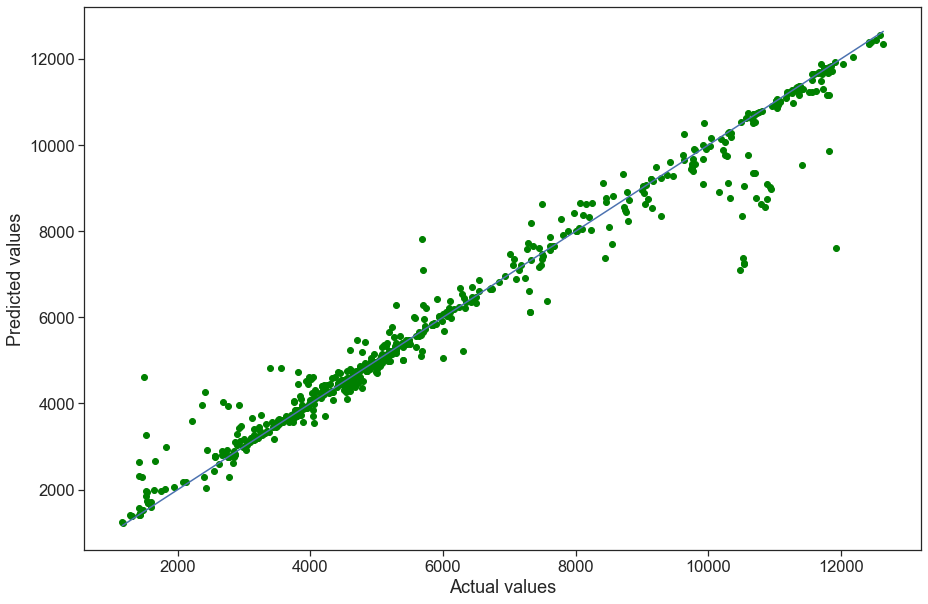

In [137]:
# Plotting Actuals Vs Predicted

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestRF2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# RFR Subplot

Text(0.5, 0, 'Actual values')

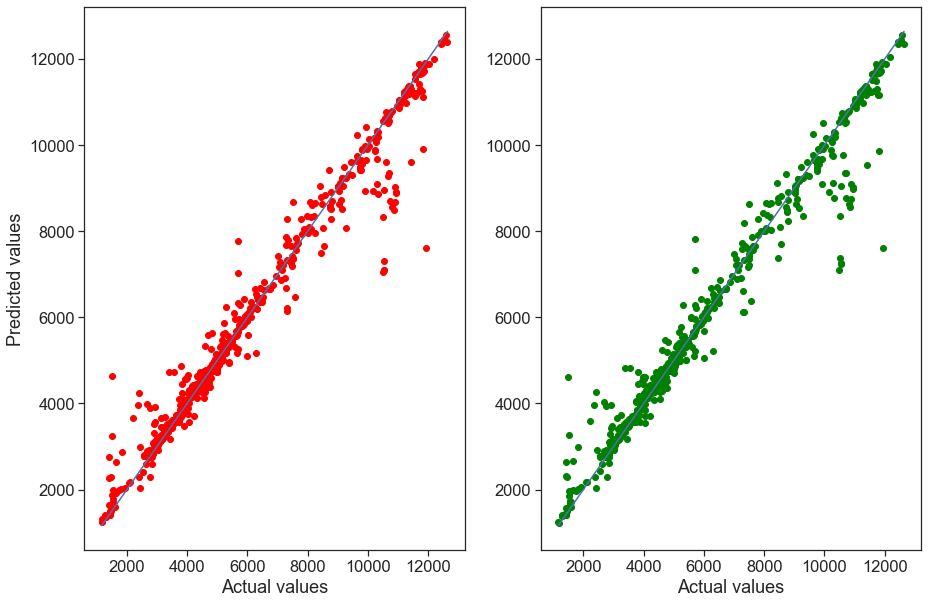

In [138]:
#Subplot

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.subplot(1,2,1)


plt.scatter(y_test,y_predTestRF, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')



plt.subplot(1,2,2)

plt.scatter(y_test,y_predTestRF2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
#plt.ylabel('Predicted values')

# XGboost Regressor

# Test Data

# R2

In [139]:

y_predTestXB=xgbhoost.predict(X_test) 

print("train r2 score",r2_score(y_test,y_predTestXB))


train accuracy score 0.9621318728339397


# RMSE

In [140]:

print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestXB))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

The RMSE on the testing data is 592.1605486263106


Text(0, 0.5, 'Predicted values')

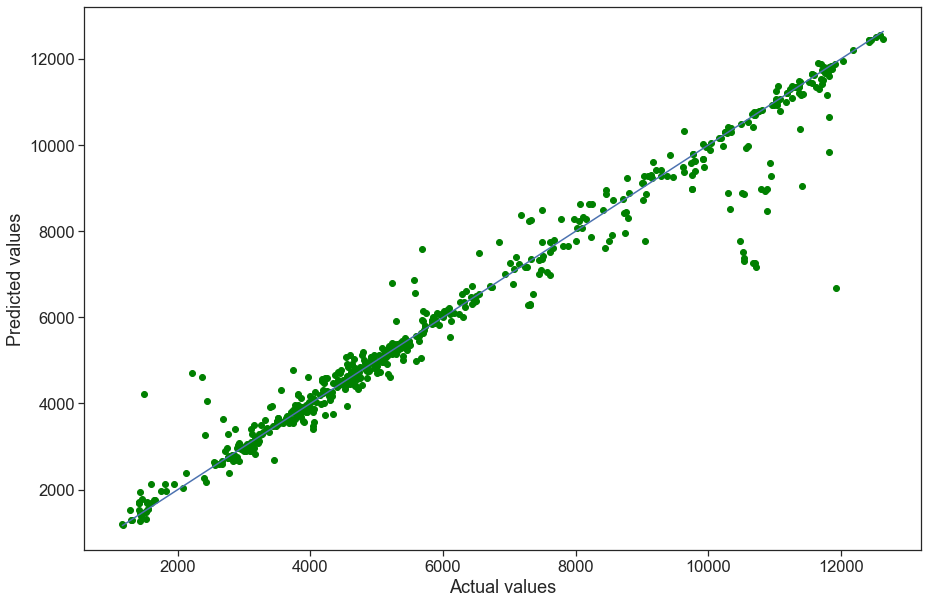

In [141]:
 #Plotting Actuals Vs Predicted

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestXB, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# Tuning

In [142]:
# Define the hyperparameter grid
parameters = {'max_depth': [10,12,14,16,18,20],
              'learning_rate': [0.1, 0.01, 0.001],
              'min_child_weight': [ 1, 3, 5, 7],
              'colsample_bytree':[ 0.3, 0.4],
              'subsample': [0.5, 0.7, 1]
} 

In [143]:
from sklearn.model_selection import GridSearchCV

tuning_model3=GridSearchCV(xgbhoost,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3,verbose=3)

In [144]:
tuning_model3.fit(X_train,y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.5;, score=-1536.552 total time=   0.5s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.5;, score=-1441.731 total time=   0.4s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.5;, score=-1456.699 total time=   0.5s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.7;, score=-1535.198 total time=   0.3s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.7;, score=-1474.354 total time=   0.3s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=0.7;, score=-1478.081 total time=   0.4s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, subsample=1;, 

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5, subsample=0.7;, score=-1469.663 total time=   0.3s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5, subsample=1;, score=-1509.743 total time=   0.3s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5, subsample=1;, score=-1458.475 total time=   0.3s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5, subsample=1;, score=-1508.099 total time=   0.3s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7, subsample=0.5;, score=-1367.628 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7, subsample=0.5;, score=-1297.326 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7, subsample=0.5;, score=-1353.469 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=0.5;, score=-1474.293 total time=   0.4s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=0.7;, score=-1568.736 total time=   0.4s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=0.7;, score=-1484.051 total time=   0.4s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=0.7;, score=-1548.761 total time=   0.4s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=1;, score=-1607.983 total time=   0.4s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=1;, score=-1527.863 total time=   0.4s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=16, min_child_weight=3, subsample=1;, score=-1554.711 total time=   0.4s
[CV 1/3] END colsample_bytree=0.3

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=18, min_child_weight=7, subsample=1;, score=-1473.856 total time=   0.3s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.5;, score=-1632.877 total time=   0.5s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.5;, score=-1583.066 total time=   0.5s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.5;, score=-1554.831 total time=   0.5s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.7;, score=-1672.286 total time=   0.6s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.7;, score=-1606.302 total time=   0.6s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.1, max_depth=20, min_child_weight=1, subsample=0.7;, score=-1609.203 total time=   0.6s
[CV 1/3] END colsample_bytree

[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=1;, score=-2678.582 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=1;, score=-2528.054 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=1;, score=-2661.492 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=0.5;, score=-2701.264 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=0.5;, score=-2544.776 total time=   0.1s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=0.5;, score=-2643.559 total time=   0.1s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=0.7;, score=-2686.317 total time=   0.2s
[CV 2/3] END colsample_byt

[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=0.7;, score=-2693.940 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=0.7;, score=-2546.699 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=0.7;, score=-2664.673 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=1;, score=-2684.410 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=1;, score=-2545.334 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=3, subsample=1;, score=-2669.022 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=0.5;, score=-2699.396 total time=   0.1s
[CV 2/3] END colsample_byt

[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.5;, score=-2712.046 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.5;, score=-2559.204 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.5;, score=-2662.271 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.7;, score=-2707.340 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.7;, score=-2553.283 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=0.7;, score=-2672.237 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=1;, score=-2701.613 total time=   0.3s
[CV 2/3] END colsample

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=5, subsample=0.7;, score=-2653.385 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=5, subsample=1;, score=-2682.096 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=5, subsample=1;, score=-2537.826 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=5, subsample=1;, score=-2671.734 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=0.5;, score=-2701.671 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=0.5;, score=-2546.434 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=0.5;, score=-2647.145 total time=   0.2s
[CV 1/3] END colsample_byt

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=0.5;, score=-5715.971 total time=   0.1s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=0.7;, score=-5715.037 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=0.7;, score=-5496.469 total time=   0.1s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=0.7;, score=-5717.111 total time=   0.1s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=1;, score=-5714.320 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=1;, score=-5497.977 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=12, min_child_weight=3, subsample=1;, score=-5718.939 total time=   0.2s
[CV 1/3] END colsam

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=14, min_child_weight=7, subsample=1;, score=-5717.444 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.5;, score=-5716.564 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.5;, score=-5499.156 total time=   0.1s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.5;, score=-5716.110 total time=   0.1s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.7;, score=-5716.026 total time=   0.2s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.7;, score=-5496.937 total time=   0.1s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=0.7;, score=-5717.524 total time=   0.2s
[CV 1/3] END co

[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=5, subsample=0.7;, score=-5716.494 total time=   0.1s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=5, subsample=1;, score=-5713.836 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=5, subsample=1;, score=-5497.473 total time=   0.2s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=5, subsample=1;, score=-5718.500 total time=   0.2s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.5;, score=-5714.309 total time=   0.1s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.5;, score=-5497.030 total time=   0.1s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.5;, score=-5714.660 total time=   0.1s
[CV 1/3] END colsam

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=0.5;, score=-530.798 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=0.5;, score=-520.749 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=0.7;, score=-559.199 total time=   0.3s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=0.7;, score=-505.807 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=0.7;, score=-517.717 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=1;, score=-507.908 total time=   0.3s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3, subsample=1;, score=-463.637 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, lea

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, subsample=1;, score=-468.880 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, subsample=1;, score=-467.659 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=14, min_child_weight=1, subsample=0.5;, score=-571.877 total time=   0.4s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=14, min_child_weight=1, subsample=0.5;, score=-523.730 total time=   0.4s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=14, min_child_weight=1, subsample=0.5;, score=-524.448 total time=   0.4s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=14, min_child_weight=1, subsample=0.7;, score=-554.628 total time=   0.5s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=14, min_child_weight=1, subsample=0.7;, score=-506.223 total time=   0.5s
[CV 3/3] END colsample_bytree=0.4, lea

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=5, subsample=0.7;, score=-477.942 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=5, subsample=0.7;, score=-507.779 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=5, subsample=1;, score=-534.411 total time=   0.4s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=5, subsample=1;, score=-461.659 total time=   0.4s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=5, subsample=1;, score=-482.193 total time=   0.4s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=7, subsample=0.5;, score=-591.698 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=16, min_child_weight=7, subsample=0.5;, score=-547.547 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learn

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=0.5;, score=-523.049 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=0.5;, score=-528.407 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=0.7;, score=-550.460 total time=   0.4s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=0.7;, score=-493.938 total time=   0.4s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=0.7;, score=-515.427 total time=   0.4s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=1;, score=-523.519 total time=   0.5s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, min_child_weight=3, subsample=1;, score=-464.946 total time=   0.5s
[CV 3/3] END colsample_bytree=0.4, lea

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=1;, score=-2374.534 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=10, min_child_weight=7, subsample=1;, score=-2496.596 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=12, min_child_weight=1, subsample=0.5;, score=-2579.906 total time=   0.3s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=12, min_child_weight=1, subsample=0.5;, score=-2448.505 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=12, min_child_weight=1, subsample=0.5;, score=-2563.018 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=12, min_child_weight=1, subsample=0.7;, score=-2537.924 total time=   0.4s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=12, min_child_weight=1, subsample=0.7;, score=-2413.736 total time=   0.2s
[CV 3/3] END colsample_b

[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=0.7;, score=-2543.771 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=0.7;, score=-2409.025 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=0.7;, score=-2526.048 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=1;, score=-2494.526 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=1;, score=-2374.808 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=5, subsample=1;, score=-2495.403 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=14, min_child_weight=7, subsample=0.5;, score=-2586.905 total time=   0.2s
[CV 2/3] END colsample_byt

[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=1, subsample=1;, score=-2517.714 total time=   0.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.5;, score=-2570.840 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.5;, score=-2442.648 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.5;, score=-2544.179 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.7;, score=-2536.462 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.7;, score=-2405.967 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=18, min_child_weight=3, subsample=0.7;, score=-2530.709 total time=   0.2s
[CV 1/3] END colsample

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=0.7;, score=-2419.639 total time=   0.3s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=0.7;, score=-2522.957 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=1;, score=-2497.259 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=1;, score=-2375.238 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.01, max_depth=20, min_child_weight=7, subsample=1;, score=-2494.359 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=10, min_child_weight=1, subsample=0.5;, score=-5730.678 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=10, min_child_weight=1, subsample=0.5;, score=-5514.153 total time=   0.2s
[CV 3/3] END colsample_b

[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=0.5;, score=-5509.959 total time=   0.1s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=0.5;, score=-5723.864 total time=   0.1s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=0.7;, score=-5723.407 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=0.7;, score=-5509.164 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=0.7;, score=-5723.513 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=1;, score=-5720.126 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=12, min_child_weight=5, subsample=1;, score=-5507.729 total time=   0.2s
[CV 3/3] END cols

[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=1;, score=-5722.487 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=1;, score=-5514.131 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=1, subsample=1;, score=-5725.628 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=3, subsample=0.5;, score=-5729.181 total time=   0.1s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=3, subsample=0.5;, score=-5510.945 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=3, subsample=0.5;, score=-5725.781 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=16, min_child_weight=3, subsample=0.7;, score=-5725.449 total time=   0.2s
[CV 2/3] END colsam

[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.7;, score=-5722.315 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.7;, score=-5508.198 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=0.7;, score=-5721.472 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=1;, score=-5718.524 total time=   0.2s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=1;, score=-5506.217 total time=   0.2s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=18, min_child_weight=7, subsample=1;, score=-5719.452 total time=   0.2s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.001, max_depth=20, min_child_weight=1, subsample=0.5;, score=-5731.542 total time=   0.2s
[CV 2/3] END colsam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_par

In [145]:
tuning_model3.best_params_   #code for selecting best params

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 7,
 'subsample': 1}

In [146]:
xgbhoost_1 = XGBRegressor(verbosity=0,n_jobs=-1,
                          colsample_bytree=0.4,
                          learning_rate=0.1,
                          max_depth= 20,
                          min_child_weight= 7,
                          subsample= 1 ) 
  
# fit the regressor with X and Y data

xgbhoost_1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

# R2

In [147]:
y_predTestXB2=xgbhoost_1.predict(X_test) 

print("train r2 score",r2_score(y_test,y_predTestXB2))


train accuracy score 0.9473905138766369


# RMSE

In [148]:

print ('The RMSE on the testing data is',sqrt(mean_squared_error(y_test,y_predTestXB2))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

The RMSE on the testing data is 697.9665129792214


Text(0, 0.5, 'Predicted values')

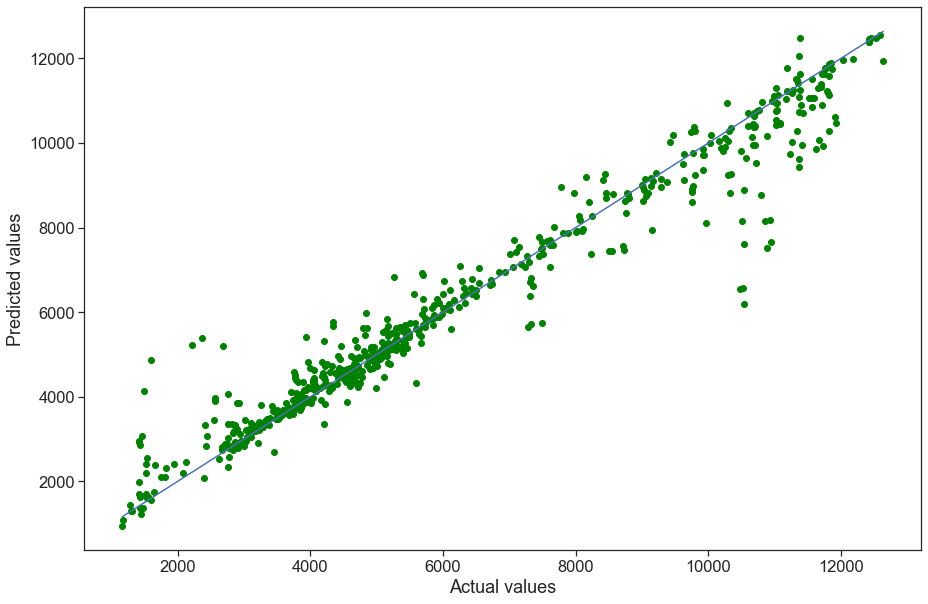

In [149]:
 #Plotting Actuals Vs Predicted

#Test data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(y_test,y_predTestXB2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


Text(0.5, 0, 'Actual values')

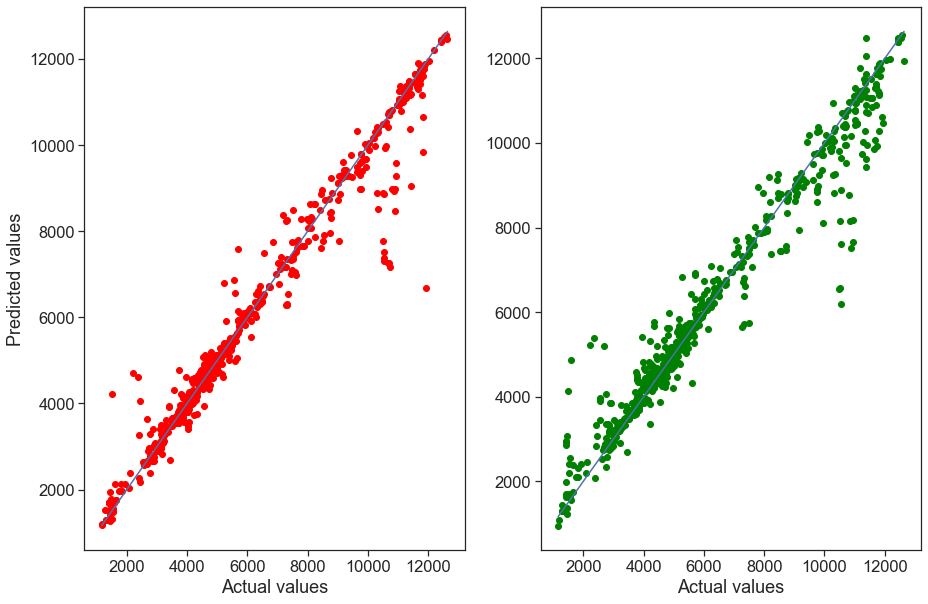

In [150]:
#Subplot

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.subplot(1,2,1)


plt.scatter(y_test,y_predTestXB, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')



plt.subplot(1,2,2)

plt.scatter(y_test,y_predTestXB2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
#plt.ylabel('Predicted values')

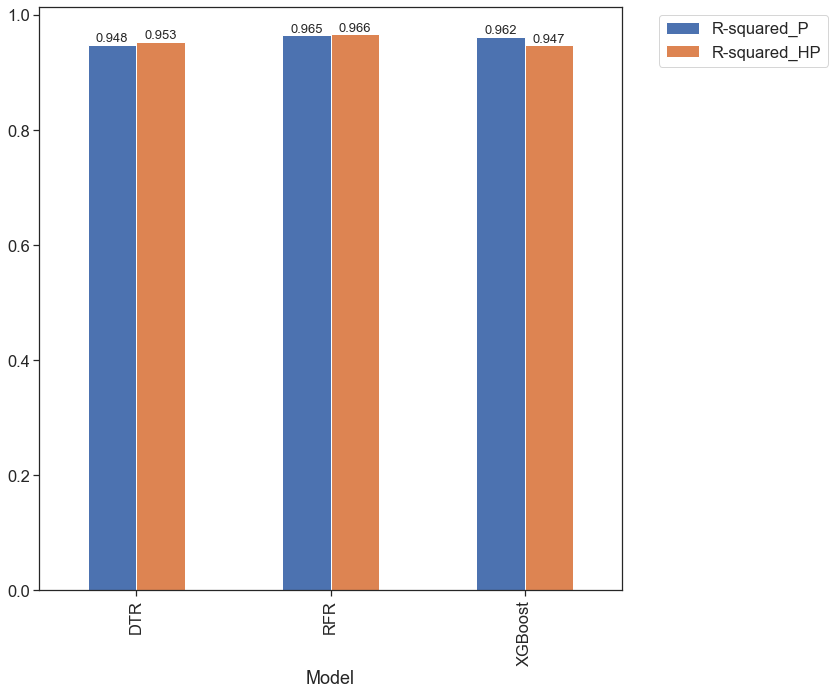

In [152]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared_P': [0.948, 0.965,0.962],
      'R-squared_HP': [0.953, 0.966,0.947],            
       'RMSE_P': [695.863, 568.776, 592.161],
        'RMSE_HP': [659.846, 559.736, 697.967]})

                  
DF

ax=DF.plot (x= 'Model',y=['R-squared_P', 'R-squared_HP'] , kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fontsize= 13, fmt='%.3f')
        

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # puts legend outside the plot
plt.tight_layout()

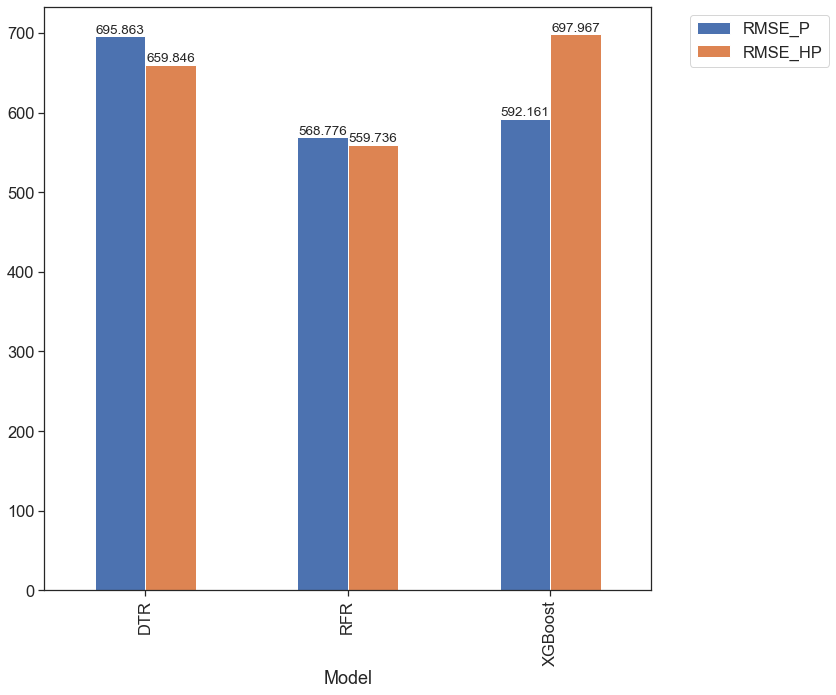

In [153]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared_P': [0.947, 0.965,0.962],
      'R-squared_HP': [0.953, 0.966,0.947],            
       'RMSE_P': [695.863, 568.776, 592.161],
        'RMSE_HP': [659.846, 559.736, 697.967]})

                  
DF

ax=DF.plot (x= 'Model',y=['RMSE_P', 'RMSE_HP'] , kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fontsize=13.5, fmt='%.3f')
        

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # puts legend outside the plot
plt.tight_layout()

In [ ]:
# Subplots

Text(0.5, 1.0, 'XGBoost_Hyperparameters')

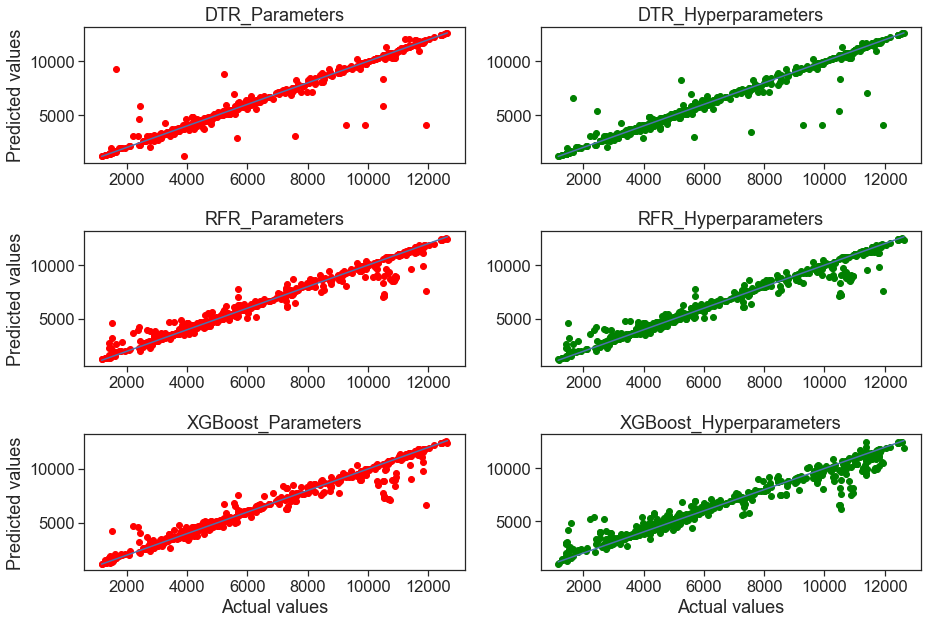

In [154]:
#Subplot


plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

# Adjust the subplot layout parameters
plt.subplots_adjust(hspace = 0.5)

#DTR Parameter on Test

plt.subplot(3,2,1)

plt.scatter(y_test,y_predTestR, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.ylabel('Predicted values')
plt.title('DTR_Parameters')

# DTR Hyper Parameter on Test
plt.subplot(3,2,2)

plt.scatter(y_test,y_predTestR1, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.title('DTR_Hyperparameters')



#RFR Parameter
plt.subplot(3,2,3)

plt.scatter(y_test,y_predTestRF, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.ylabel('Predicted values')
plt.title('RFR_Parameters')


#RF Hyperparameter
plt.subplot(3,2,4)

plt.scatter(y_test,y_predTestRF2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.title('RFR_Hyperparameters')


#XGBoost parameter
plt.subplot(3,2,5)

plt.scatter(y_test,y_predTestXB, color='red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('XGBoost_Parameters')

#XGBoost Hyperparameter
plt.subplot(3,2,6)

plt.scatter(y_test,y_predTestXB2, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.title('XGBoost_Hyperparameters')

# ANN

from sklearn.neural_network import MLPRegreesor

# Validation data

In [ ]:
# Do all Necessary processing (cleaning, scaling as done before)

In [155]:
# Load data

raw_dataT= pd.read_csv('/Users/stephenadjei/Desktop/UUCS/UCS_Test.csv')
# print the shape

print(raw_dataT.shape)

#runs the first 5 rows

raw_dataT.head()

(870, 9)


Index  DEPTH(ft)  WOB(klbf)  TORQUE(kft.lbf)  SPP(psi)  RPM(1/min)  \
0      1     4508.0     19.843            8.461  2401.584     108.768   
1      2     4511.5     19.975            8.356  2447.975     113.049   
2      3     4514.0     20.057            8.252  2473.245     115.631   
3      4     4517.0     20.139            8.132  2497.413     118.558   
4      5     4520.0     20.315            8.068  2516.756     121.135   

   ROP(ft/h)  Fow Rate, gpm    UCS, psi  
0     35.350         799.250  11386.519  
1     35.908         806.701  11370.463  
2     35.785         810.844  11369.208  
3     35.352         814.900  11362.234  
4     35.245         818.200  11357.741

In [156]:
#here I am changing the column names
raw_dataT.columns=['Index','DEPTH','WOB','TORQUE','SPP','RPM','ROP','Flow_rate','UCS']
raw_dataT

Index   DEPTH     WOB  TORQUE       SPP      RPM     ROP  Flow_rate  \
0        1  4508.0  19.843   8.461  2401.584  108.768  35.350    799.250   
1        2  4511.5  19.975   8.356  2447.975  113.049  35.908    806.701   
2        3  4514.0  20.057   8.252  2473.245  115.631  35.785    810.844   
3        4  4517.0  20.139   8.132  2497.413  118.558  35.352    814.900   
4        5  4520.0  20.315   8.068  2516.756  121.135  35.245    818.200   
..     ...     ...     ...     ...       ...      ...     ...        ...   
865    866  7404.5  15.733   9.791  2988.912  100.229  74.356    650.814   
866    867  7419.0  14.347   9.642  2996.404  101.375  72.571    651.366   
867    868  7422.5  13.768   9.557  3002.678  101.724  72.704    651.369   
868    869  7423.5  13.645   9.546  3004.716  101.866  72.788    651.362   
869    870  7424.0  13.594   9.541  3005.787  101.948  72.817    651.355   

           UCS  
0    11386.519  
1    11370.463  
2    11369.208  
3    11362.234  
4    11357.741  
..         ...  
865   7074.763  
866   8300.325  
867   8887.807  
868   9121.223  
869   9212.369  

[870 rows x 9 columns]

In [157]:
new_raw_dataT=raw_dataT[['WOB', 'TORQUE', 'SPP', 'RPM', 'ROP', 'Flow_rate','UCS' ]]

In [158]:
XV = new_raw_dataT.drop('UCS', axis = 1)
yV=new_raw_dataT.UCS

# Decision Tree Regressor

# R2

In [159]:

     # Model Accuracy on validation dataset --- how well it does on unseen data

y_predValDT=regressor_1.predict(XV)  

print('The accuracy on the validation dataset is',r2_score(yV, y_predValDT))

The accuracy on the validation dataset is 0.9217464632506809


# RMSE

In [160]:
print ('The RMSE on the validationv  data is',sqrt(mean_squared_error(yV,y_predValDT))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


The RMSE on the validationv  data is 856.093137596107


Text(0, 0.5, 'Predicted values')

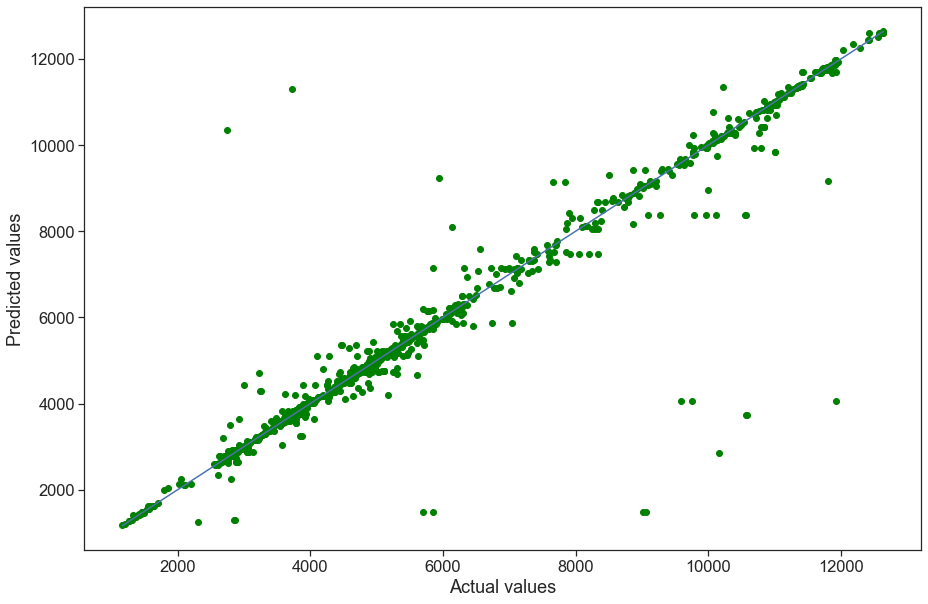

In [161]:
#Validation data

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(yV,y_predValDT, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is


# Random Forest 

# R2

In [162]:
y_predValRF=rd_clf2.predict(XV)  

print('The accuracy on the validation dataset is',r2_score(yV, y_predValRF))



The accuracy on the validation dataset is 0.971621798961465


# RMSE

In [163]:


print ('The RMSE on the validation data is',sqrt(mean_squared_error(yV,y_predValRF))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

The RMSE on the validation data is 515.5389216248838


Text(0, 0.5, 'Predicted values')

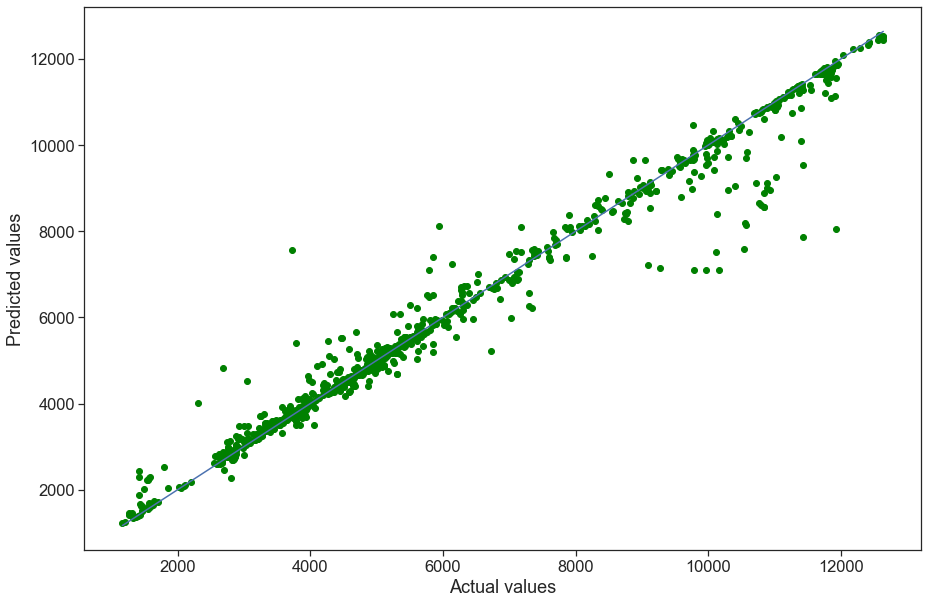

In [164]:
#Validation data



plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(yV,y_predValRF, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
#plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is

# XGboost Regressor

In [165]:
# already fine tuned

xgbhoost.fit(XV,yV) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

# R2 

In [166]:
#Test data

y_predValXB=xgbhoost.predict(XV) 

print("validation accuracy score",r2_score(yV,y_predValXB))


validation accuracy score 0.9998390838698845


# RMSE

In [167]:


print ('The RMSE on the validation data is',sqrt(mean_squared_error(yV,y_predValXB))) 


# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

The RMSE on the validation data is 38.821187696804586


Text(0.5, 1.0, 'Actuals vs Predicted Test Values')

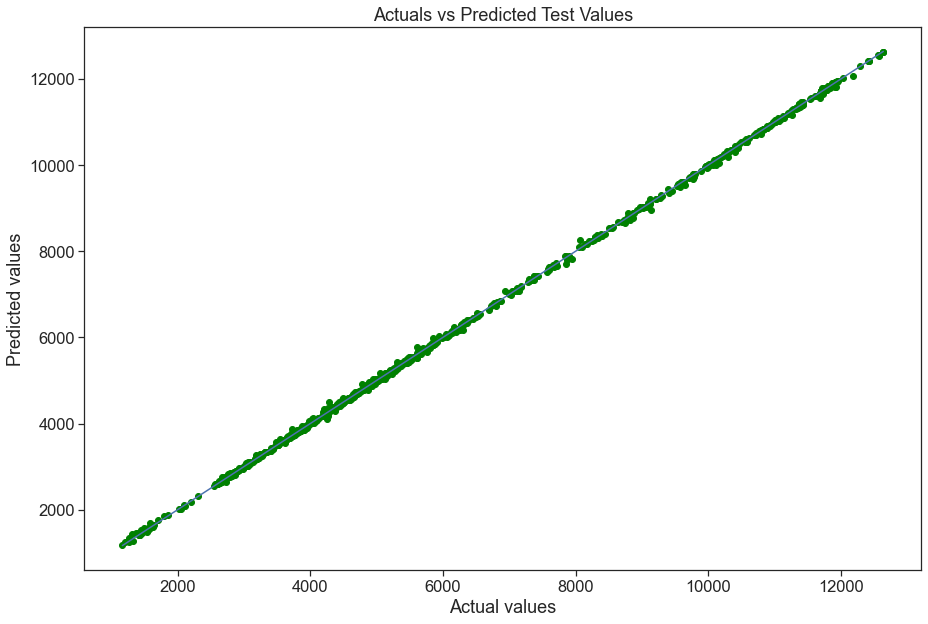

In [168]:

# plot

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

plt.scatter(yV,y_predValXB, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actuals vs Predicted Test Values')

#the closer the data points to the line, the better the model is

# Evaluation Parameters

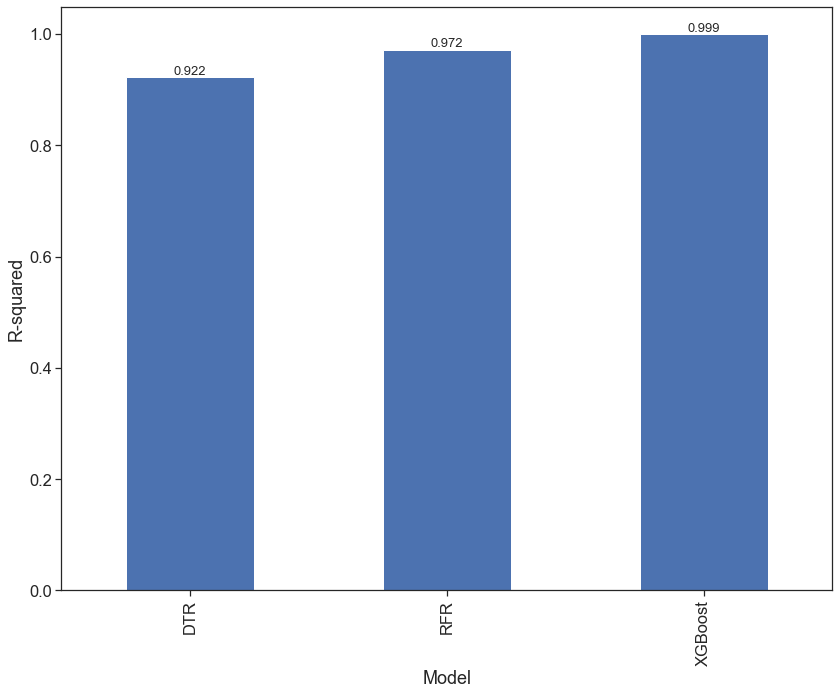

In [169]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared': [0.922, 0.972,0.999],           
       'RMSE': [856.093, 515.539, 38.821]})

                  
DF  # this will show you the dataframe

ax=DF.plot (x= 'Model',y='R-squared' , kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fontsize= 13, fmt='%.3f')
        

plt.ylabel('R-squared')
plt.legend('', frameon=False) #removes legend
plt.tight_layout()

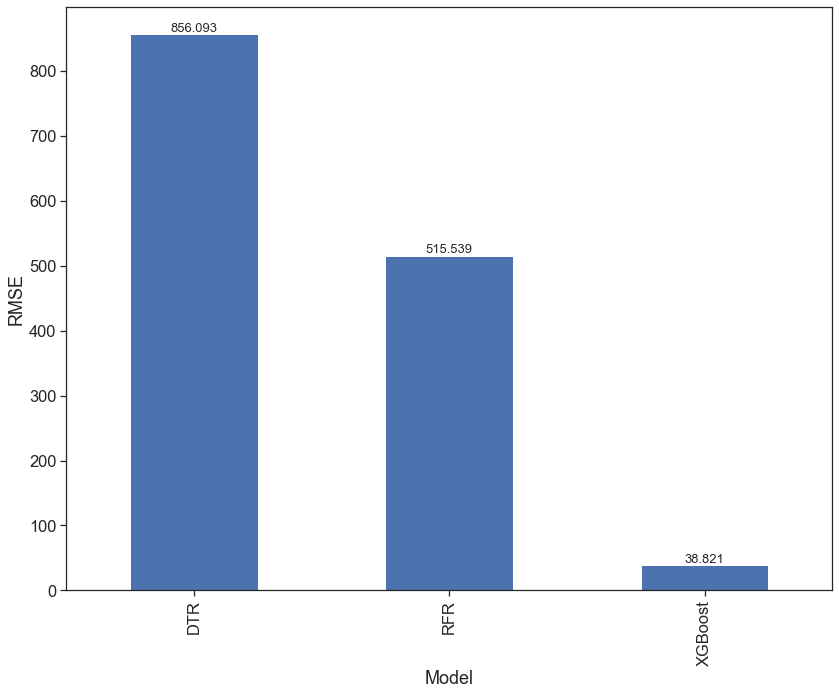

In [170]:
DF =pd.DataFrame ({'Model':['DTR','RFR','XGBoost'],
      'R-squared': [0.922, 0.972,0.999],           
       'RMSE': [856.093, 515.539, 38.821]})

                  
DF  # this will show you the dataframe

ax=DF.plot (x= 'Model',y='RMSE', kind='bar')

for bars in ax.containers:
        ax.bar_label(bars, fontsize= 13, fmt='%.3f')
        


plt.ylabel('RMSE')
plt.legend('', frameon=False) #removes legend
plt.tight_layout()

# Cross Plots

In [ ]:

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_style('ticks')

#DTR

plt.subplot(1,3,1)
plt.scatter(yV,y_predValDT, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('DTR')

#RFR
plt.subplot(1,3,2)
plt.scatter(yV,y_predValRF, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.title('RFR')


#XGBoost

# plot
plt.subplot(1,3,3)
plt.scatter(yV,y_predValXB, color='green')
plt.plot([yV.min(), yV.max()],[yV.min(), yV.max()]) # this is not regression-just strain line
plt.xlabel('Actual values')
plt.title('XGBoost')


plt.tight_layout()